<p style = "font-size : 50px; color : white ; font-family : 'Comic Sans MS'; text-align : center; background-color : black; border-radius: 5px 5px; padding: 20px;"><strong>Analytical Report</strong></p> 

Executive Summary:

    Brief overview of the task and its significance.
    Key findings and insights.
    Recommendations for resource allocation based on the analysis.

Task I: Exploratory Data Analysis (EDA):
1.1 Data Overview:

    Description of the dataset and its features.
    Data cleaning and preprocessing steps.

1.2 Descriptive Statistics:

    Summary statistics for key metrics.
    Visualization of key metrics distribution (box plots, histograms).

1.3 Firm Size Analysis:

    Examine the distribution of the total assets across firms
    Categorize firms based on their total assets.

1.4 Outlier Detection:

    Identification and handling of outliers.
    Visualization of key metrics to spot anomalies.

1.5 Feature Engineering:

    Introduction of the 'Net Combined Ratio' feature.
    Explanation of the transformation and its significance.

1.6 Clustering:

    Application of K-Means clustering.
    Visualization of clusters for 'Total assets' and 'Excess of assets over liabilities.'

1.7 Cluster Profiling:

    Further cluster analysis for all features.
    Explanation of clusters and their characteristics.

1.8 Profits Stratification:

    Stratification of profits based on the 'Net Combined Ratio.'
    Visual representation of different profit levels.

Task II: Machine Learning Model:
2.1 Data Preprocessing:

    Log transformation for outlier impact reduction.
    Scaling of features for modeling.

2.4 Model Selection & Hyperparameter Tuning:

    Grid search for optimal hyperparameters.
    Evaluation of different classifiers: Ridge, SVM, Random Forest, Logistic Regression, KNN, Naive Bayes, Gradient Boosting.

2.3 Backtesting and Evaluation:

    Time series cross-validation approach.
    Evaluation metrics: accuracy, classification report, confusion matrix.

Conclusion:

    Summary of key findings.
    Recommendations for resource allocation.
    Potential areas for further analysis.

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Importing Necessary Libraries</strong></p> 

In [64]:
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import TimeSeriesSplit, train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)
import warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Load the data.</strong></p> 

In [2]:
data = pd.read_excel('DataScientist_009749_Dataset.xlsx', header=[0, 1])  

# Display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 41 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1)                     325 non-null    object 
 1   (NWP (£m) , 2016YE)                                          325 non-null    float64
 2   (NWP (£m) , 2017YE)                                          325 non-null    float64
 3   (NWP (£m) , 2018YE)                                          325 non-null    float64
 4   (NWP (£m) , 2019YE)                                          325 non-null    float64
 5   (NWP (£m) , 2020YE)                                          325 non-null    float64
 6   (SCR (£m), 2016YE)                                           325 non-null    float64
 7   (SCR (£m), 2017YE)                                           325 non-null    flo

In [3]:
# Visualizing the dataset
data

Unnamed: 0_level_0     NWP (£m)                               \
    Unnamed: 0_level_1        2016YE        2017YE        2018YE   
0               Firm 1 -17754.100486      0.000000      0.000000   
1               Firm 2      9.244369      0.098771     40.812426   
2               Firm 3      0.000000      0.806130     36.620199   
3               Firm 4  19677.453353  41072.816156  20885.506445   
4               Firm 5    128.812208     10.407371     79.579663   
..                 ...           ...           ...           ...   
320           Firm 321      0.000000      0.000000     -0.167178   
321           Firm 322   3315.466643   4136.476625   2192.750865   
322           Firm 323      0.000000      0.000000      0.000000   
323           Firm 324     29.811172     21.003008     13.551740   
324           Firm 325    108.471899    496.296030    437.217641   

                                     SCR (£m)                              \
           2019YE        2020YE        2016YE        2017YE        2018YE   
0        0.000000      0.000000   2021.321862  6.940043e-09      0.000000   
1       35.643071     13.626145     16.459756  1.500907e+01     14.227214   
2       86.630018     54.744180    486.887796  4.957863e+02    626.612217   
3    14719.672914  49204.465136  15975.652771  1.536789e+04  10797.123319   
4       79.423623     61.727295     32.742279  4.395404e+01     31.622572   
..            ...           ...           ...           ...           ...   
320     -6.813367     31.258806      0.000000  3.652140e-01     70.399156   
321   2252.917257   2780.628432    578.238997  1.926540e+03   1366.552217   
322      0.000000      0.000000      6.459131  2.803774e+01      5.689804   
323      6.145755     49.793157     45.967315  5.732320e+01     36.910810   
324    120.652291      0.000000    402.002179  4.082730e+02    477.423649   

                                EoF for SCR (£m)                              \
           2019YE        2020YE           2016YE        2017YE        2018YE   
0        0.000000      0.000000      2416.559785      3.796177      0.000000   
1       15.037066      1.591638        33.896967     20.945314     78.471172   
2       81.242579    362.092922       693.522688    767.252203    582.602328   
3    22788.359468  16090.310420     29997.674279  36644.404797  10096.977933   
4       30.119285     91.515289       149.654748    202.851551    167.406534   
..            ...           ...              ...           ...           ...   
320     68.655722    175.631396         0.000000      6.105482    217.971807   
321    849.073657   1571.967374      1943.291337    851.933506   1042.575410   
322      1.674462      2.456778         0.365632    101.457356     50.692218   
323      1.012305     37.294480        47.655327     45.582823     92.466950   
324    346.976664      0.000000        34.357552    390.368084    228.364506   

                               SCR coverage ratio                           \
          2019YE        2020YE             2016YE        2017YE     2018YE   
0       0.000000      0.000000           0.162520  5.588700e+07   0.000000   
1      47.730675     28.784162           5.648647  3.683321e+00  10.239507   
2     114.819729    841.932676           1.135498  1.713763e+00   1.222781   
3    8536.234831  41636.299252           0.679158  1.224834e+00   2.699102   
4     176.722199    142.783569           1.463499  4.963118e+00   3.232800   
..           ...           ...                ...           ...        ...   
320    73.379999    109.388065           0.000000  2.463978e+01   2.820308   
321  1543.932477    727.018175           2.362718  9.682089e-01   2.215886   
322    75.354843      0.069389           2.056229  5.297021e+00  22.542680   
323    29.144679     32.233744           2.304061  4.530059e-01   0.004832   
324   335.854795      0.000000           2.528626  1.705165e+00   2.181026   

                              GWP (£m)                       

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Checking for Missing Values and Duplicates</strong></p> 

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>No missing value was detected.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>No duplicates were observed.</strong></li>
</ul>

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Check for duplicates
duplicates = data.duplicated()
print("\nNumber of Duplicates:", duplicates.sum())

Missing Values:
 Series([], dtype: int64)

Number of Duplicates: 0


<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Indexing the DataFrame</strong></p> 

<p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Here, we set the first column of the DataFrame (data) as the index. The first column, previously containing the values like 'Firm 1', 'Firm 2', etc., is now used to label and uniquely identify each row in the DataFrame. This operation is crucial for enhancing data manipulation, retrieval, and analysis.</strong></p> 

<p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Significance:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Enhanced Data Retrieval: Indexing allows for efficient and quick data retrieval based on the unique identifiers (in this case, the firm names). This is particularly useful for slicing, filtering, and accessing specific rows.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Improved Readability: Using meaningful labels (such as firm names) as an index enhances the readability of the DataFrame. It makes the data more interpretable and simplifies the understanding of the dataset.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Preparation for Analysis: Many analysis and visualization functions in pandas and other libraries work more effectively with a well-defined index. Setting the index is often a crucial preprocessing step before conducting any in-depth analysis or visualization.</strong></li>
</ul>

In [5]:
# Set the first column as the index
data.set_index(data.columns[0], inplace=True)

# Display the updated DataFrame
data

NWP (£m)                 \
                                                2016YE        2017YE   
(Unnamed: 0_level_0, Unnamed: 0_level_1)                               
Firm 1                                   -17754.100486      0.000000   
Firm 2                                        9.244369      0.098771   
Firm 3                                        0.000000      0.806130   
Firm 4                                    19677.453353  41072.816156   
Firm 5                                      128.812208     10.407371   
...                                                ...           ...   
Firm 321                                      0.000000      0.000000   
Firm 322                                   3315.466643   4136.476625   
Firm 323                                      0.000000      0.000000   
Firm 324                                     29.811172     21.003008   
Firm 325                                    108.471899    496.296030   

                                                                      \
                                                2018YE        2019YE   
(Unnamed: 0_level_0, Unnamed: 0_level_1)                               
Firm 1                                        0.000000      0.000000   
Firm 2                                       40.812426     35.643071   
Firm 3                                       36.620199     86.630018   
Firm 4                                    20885.506445  14719.672914   
Firm 5                                       79.579663     79.423623   
...                                                ...           ...   
Firm 321                                     -0.167178     -6.813367   
Firm 322                                   2192.750865   2252.917257   
Firm 323                                      0.000000      0.000000   
Firm 324                                     13.551740      6.145755   
Firm 325                                    437.217641    120.652291   

                                                            SCR (£m)  \
                                                2020YE        2016YE   
(Unnamed: 0_level_0, Unnamed: 0_level_1)                               
Firm 1                                        0.000000   2021.321862   
Firm 2                                       13.626145     16.459756   
Firm 3                                       54.744180    486.887796   
Firm 4                                    49204.465136  15975.652771   
Firm 5                                       61.727295     32.742279   
...                                                ...           ...   
Firm 321                                     31.258806      0.000000   
Firm 322                                   2780.628432    578.238997   
Firm 323                                      0.000000      6.459131   
Firm 324                                     49.793157     45.967315   
Firm 325                                      0.000000    402.002179   

                                                                      \
                                                2017YE        2018YE   
(Unnamed: 0_level_0, Unnamed: 0_level_1)                               
Firm 1                                    6.940043e-09      0.000000   
Firm 2                                    1.500907e+01     14.227214   
Firm 3                                    4.957863e+02    626.612217   
Firm 4                                    1.536789e+04  10797.123319   
Firm 5                                    4.395404e+01     31.622572   
...                                                ...           ...   
Firm 321                                  3.652140e-01     70.399156   
Firm 322                                  1.926540e+03   1366.552217   
Firm 323                                  2.803774e+01      5.689804   
Firm 324                                  5.732320e+01     36.910810   
Firm 325                                  4.082730e+02    477.423649   

         

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Data Reshaping and Indexing</strong></p> 

<p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Here, we've performed several operations on our DataFrame (data). We initially converted a wide-formatted DataFrame into a long-formatted one using stack(), making it easier to analyze time series data. Afterward, we modified the index and columns to enhance the readability and usability of the DataFrame.</strong></p> 

<p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Significance:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Reshaping Data: The stack() function transforms the DataFrame from a wide format (with years as columns) to a long format. This transformation is crucial for certain types of analyses, especially time series analysis or when working with data visualization tools that prefer data in a particular format.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Column Renaming: The index.names attribute is used to assign meaningful names to the index columns. Here, the 'Firms' and 'Years' columns have been explicitly labeled to improve the understanding of the data.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Data Cleaning: The str.replace() method is utilized to clean the 'Years' column by removing the 'YE' characters, which likely represent 'Year End'. This makes the year labels more concise and easier to interpret.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Index Reset and Reassignment: The reset_index() and set_index() operations are employed to reset the index temporarily to manipulate the 'Years' column and then set both 'Firms' and 'Years' as the new index. This reorganization facilitates improved data retrieval and better indexing for analysis purposes.</strong></li>
</ul>

In [6]:
data_pivot = data.stack()

# Rename the index column to 'Firms'
data_pivot.index.names = ['Firms', 'Years']

# Remove 'YE' from the 'Years' column
data_pivot.reset_index(inplace=True)
data_pivot['Years'] = data_pivot['Years'].str.replace('YE', '')

# Set 'Firms' and 'Years' columns back as index
data_pivot.set_index(['Firms', 'Years'], inplace=True)

# Display the updated DataFrame
data_pivot

EoF for SCR (£m)  \
Firms    Years                     
Firm 1   2016        2416.559785   
         2017           3.796177   
         2018           0.000000   
         2019           0.000000   
         2020           0.000000   
...                          ...   
Firm 325 2016          34.357552   
         2017         390.368084   
         2018         228.364506   
         2019         335.854795   
         2020           0.000000   

                Excess of assets over liabilities (£m) [= equity]    GWP (£m)  \
Firms    Years                                                                  
Firm 1   2016                                         1243.924991   46.768030   
         2017                                            4.398725    0.000000   
         2018                                            0.000000    0.000000   
         2019                                            0.000000    0.000000   
         2020                                            0.000000    0.000000   
...                                                           ...         ...   
Firm 325 2016                                          183.264710  416.840590   
         2017                                          124.780162  268.849304   
         2018                                          632.096113  798.844001   
         2019                                          592.454455  314.507673   
         2020                                            0.000000    0.000000   

                   NWP (£m)       SCR (£m)  SCR coverage ratio  \
Firms    Years                                                   
Firm 1   2016  -17754.100486  2.021322e+03        1.625197e-01   
         2017       0.000000  6.940043e-09        5.588700e+07   
         2018       0.000000  0.000000e+00        0.000000e+00   
         2019       0.000000  0.000000e+00        0.000000e+00   
         2020       0.000000  0.000000e+00        0.000000e+00   
...                      ...           ...                 ...   
Firm 325 2016     108.471899  4.020022e+02        2.528626e+00   
         2017     496.296030  4.082730e+02        1.705165e+00   
         2018     437.217641  4.774236e+02        2.181026e+00   
         2019     120.652291  3.469767e+02        7.520315e-01   
         2020       0.000000  0.000000e+00        0.000000e+00   

                Total assets (£m)  Total liabilities (£m)  
Firms    Years                                             
Firm 1   2016        63676.869102            40171.683156  
         2017            9.566096                0.000000  
         2018            0.000000                0.000000  
         2019            0.000000                0.000000  
         2020            0.000000                0.000000  
...                           ...                     ...  
Firm 325 2016         2562.232751              673.343922  
         2017          526.087601              989.011927  
         2018         1006.111747             1762.579368  
         2019         2143.411774             1487.323190  
         2020            0.000000                0.000000  

[1625 rows x 8 columns]

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px; padding: 20px;"><strong>Data Exploration - EDA</strong></p> 

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Summary Statistics</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>The summary statistics table provides key numerical insights into the distribution of each feature. Here's a summarial explanation:</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>1. EoF for SCR (£m)::</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The mean (average) value is approximately £504 million.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The standard deviation is relatively high at £2.26 billion, indicating significant variability in the data.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The minimum value is negative, suggesting instances where the EoF for SCR is in deficit.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>2. Excess of assets over liabilities (£m) [= equity]:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The mean is approximately £539 million, slightly higher than the EoF for SCR.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The standard deviation is also considerable at £2.17 billion.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The minimum value is negative, indicating cases where assets are less than liabilities.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>3. GWP (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The mean is £936 million, with a relatively high standard deviation of £4.76 billion.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The distribution is right-skewed, as the 75th percentile is higher than the mean.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>4. NWP (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The mean is £732 million, with a substantial standard deviation of £3.97 billion.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The minimum value is significantly negative, indicating instances where NWP is in deficit.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>5. SCR (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The mean SCR is £347 million, with a standard deviation of £1.57 billion.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The distribution is right-skewed, as the 75th percentile is higher than the mean.</strong></li>
</ul>    

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>6. SCR coverage ratio:</strong></p>    
        
 <ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The mean SCR coverage ratio is exceptionally high at approximately 1.23 million.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The standard deviation is extremely large, suggesting considerable variation.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The minimum value is negative, which may warrant further investigation.</strong></li>
</ul>      

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>7. Total assets (£m):</strong></p>    
        
<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The mean total assets are £7.24 billion, with a high standard deviation of £33.46 billion.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The distribution is right-skewed, with a significantly higher 75th percentile compared to the mean.</strong></li>
</ul> 

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>8. Total liabilities (£m):</strong></p>            
<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The mean total liabilities are £7.08 billion, similar to the mean total assets.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The standard deviation is high at £33.53 billion, indicating substantial variability.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The minimum value is negative, suggesting instances where liabilities are less than assets.</strong></li>
</ul>  

In [7]:
# Calculate summary statistics for each feature
summary_statistics = data_pivot.describe().transpose()

# Display the table
summary_statistics

,count,mean,std,min,25%,50%,75%,max
EoF for SCR (£m),1625.0,5.040961e+02,2.262297e+03,-162.245016,2.879599,25.548589,162.428978,4.163630e+04
Excess of assets over liabilities (£m) [= equity],1625.0,5.391072e+02,2.174167e+03,-123.609578,3.515754,29.582864,166.413248,2.670504e+04
GWP (£m),1625.0,9.366950e+02,4.757191e+03,-19.777480,0.000000,8.686859,178.699850,7.407864e+04
NWP (£m),1625.0,7.317561e+02,3.969010e+03,-17754.100486,0.000000,3.625627,90.225184,7.552667e+04
SCR (£m),1625.0,3.466352e+02,1.570006e+03,0.000000,0.738866,11.637984,91.415724,2.278836e+04
SCR coverage ratio,1625.0,1.228704e+06,3.383049e+07,-3.488211,0.291467,1.587490,3.061232,9.993029e+08
Total assets (£m),1625.0,7.244856e+03,3.346282e+04,-207.356238,6.543713,85.932872,926.199445,5.535499e+05
Total liabilities (£m),1625.0,7.080305e+03,3.352781e+04,-1487.107764,0.847367,45.545844,643.826070,4.944985e+05


<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Outliers Detection and Handling:</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Below we create subplots for each feature, displaying box plots to identify potential outliers. This further buttresses the findings from our summary statistics showing right-skewed distributions all the features</strong></p>

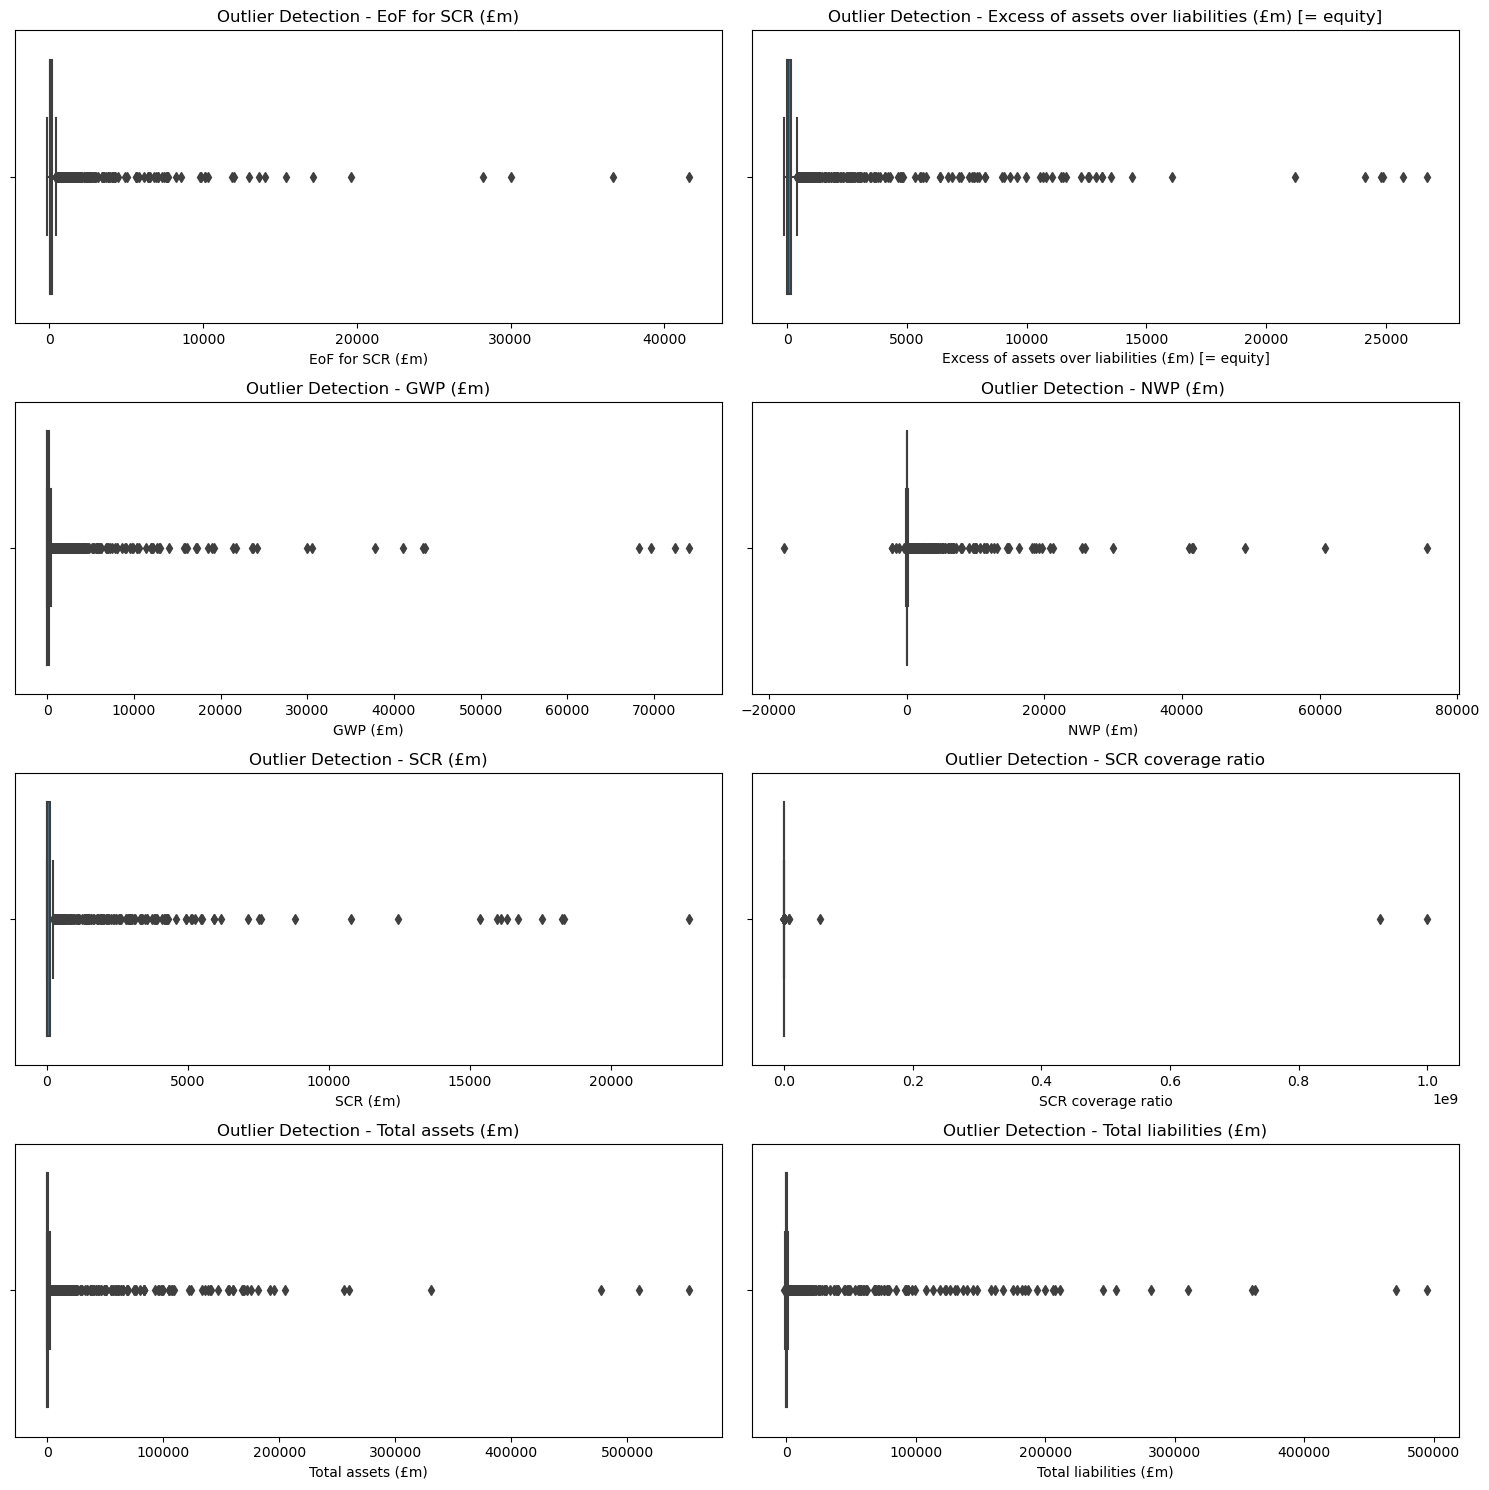

In [8]:
# Set up a subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Plot box plots for each feature
for idx, feature in enumerate(data_pivot.columns):
    ax = axes[idx // 2, idx % 2]
    sns.boxplot(x=data_pivot[feature], ax=ax)
    ax.set_title(f'Outlier Detection - {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Exploration of Financial Metrics: Comparative Analysis of Top 10 Firms.</strong></p> 

<ul>
<li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>This visualization allows for a quick comparison of the top-performing firms across various financial metrics. Stakeholders can easily identify firms that consistently demonstrate superior performance in specific areas, helping in strategic decision-making and resource allocation.</strong></li>
</ul>

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>The bar-plots below presents the mean values across years for various financial features of the top 10 firms. Here's a summary of the key findings:</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>1. EoF for SCR (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The highest mean value is observed for Firm 105, indicating a significant excess of funds for Solvency Capital Requirement (SCR).</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Other firms, such as Firm 4, Firm 34, and Firm 7, also have substantial values in this category.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>2. Excess of assets over liabilities (£m) [= equity]:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 105 again leads in terms of mean excess of assets over liabilities, suggesting a strong financial position.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 4 and Firm 34 follow closely, indicating robust financial health.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>3. GWP (£m) and NWP (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 4 has the highest mean values for both Gross Written Premium (GWP) and Net Written Premium (NWP), suggesting significant business activity.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Other firms like Firm 105 and Firm 34 also show substantial values in these categories.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>4. SCR (£m) and SCR coverage ratio:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The mean SCR values and SCR coverage ratios are notable for each firm, indicating their capital adequacy in meeting regulatory requirements.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>5. Total assets (£m) and Total liabilities (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 105 and Firm 311 have the highest mean total assets, suggesting substantial asset bases.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Total liabilities are also substantial, indicating the financial obligations of these firms.</strong></li>
</ul>

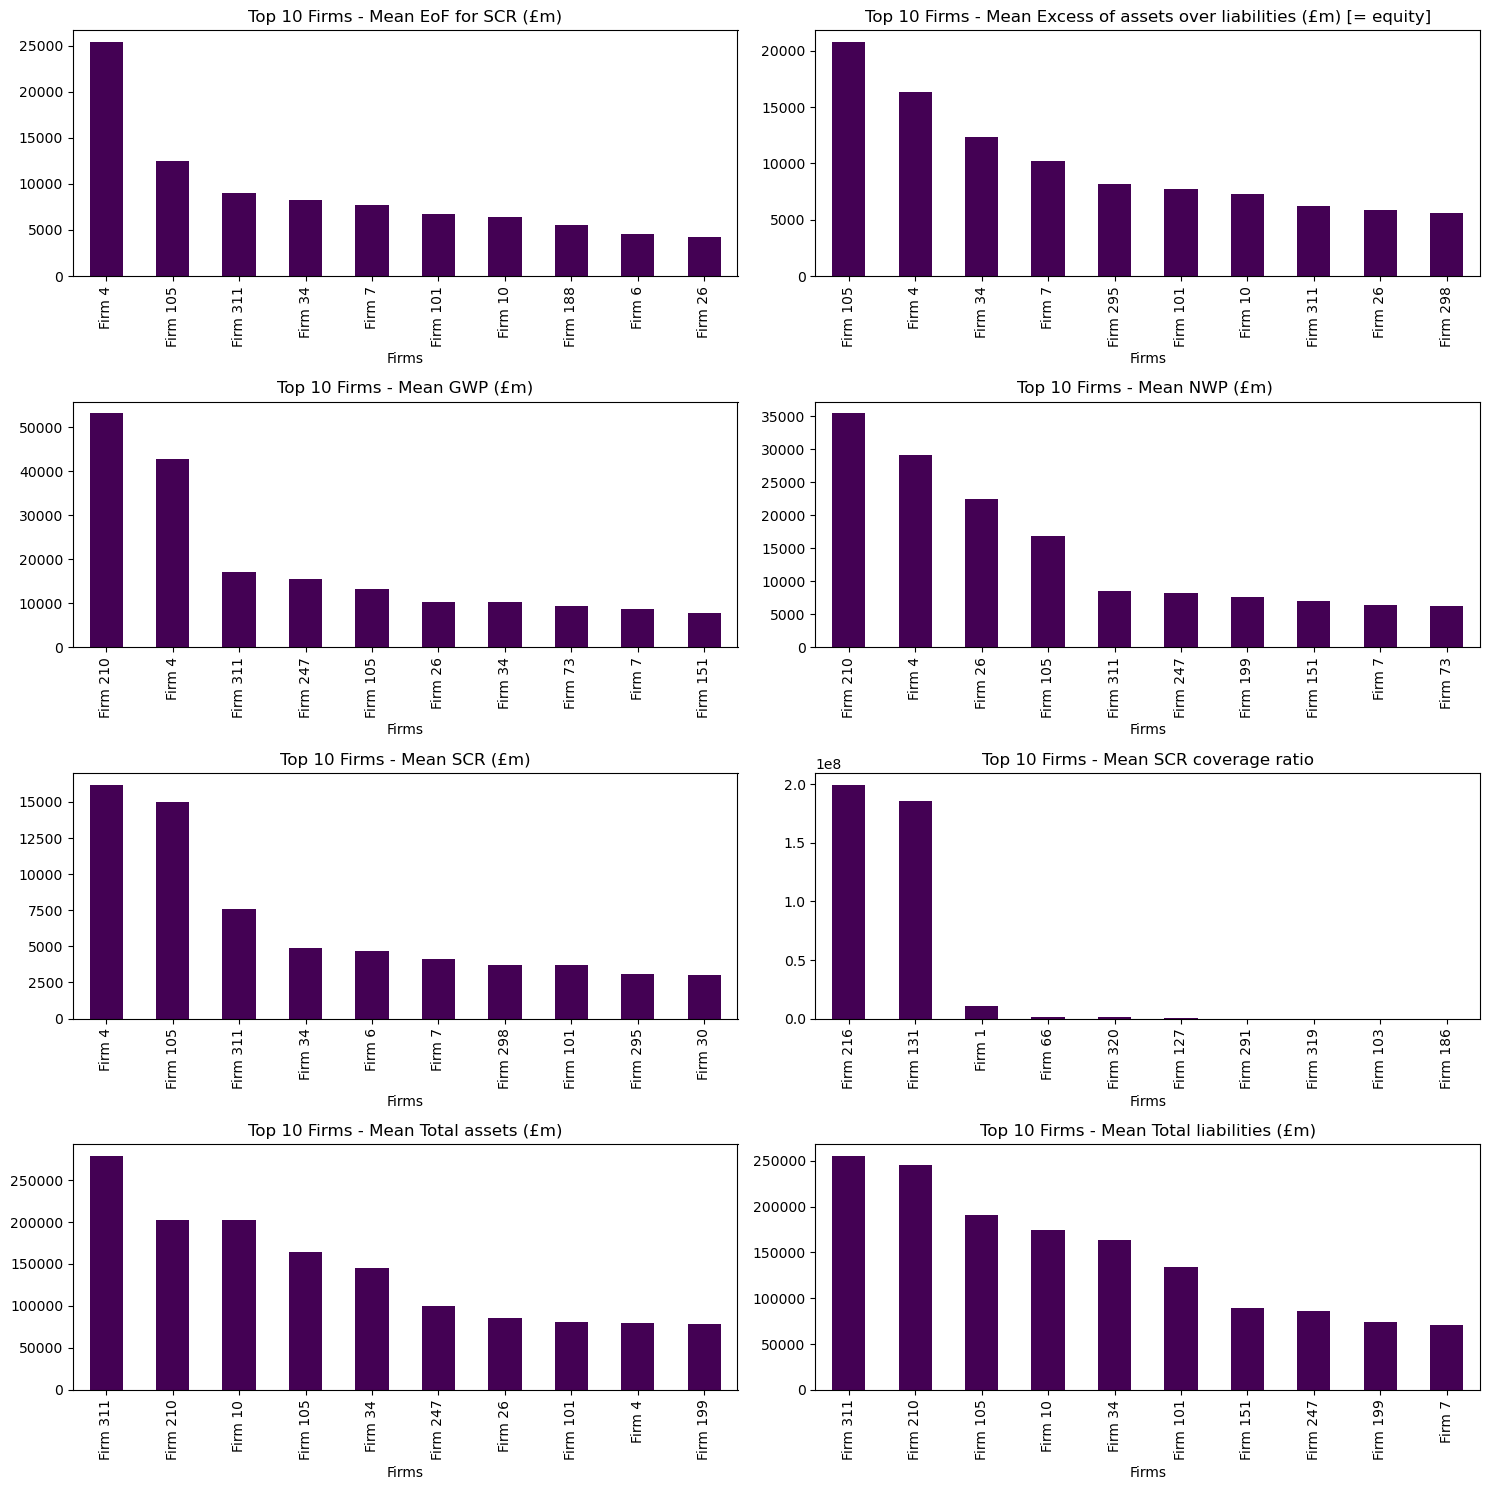

In [9]:
# Calculate the mean of each feature across all years for each firm
mean_values_across_years = data_pivot.groupby(level=0).mean()

# Set up a 4x2 subplot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Plot the mean values for each feature
for idx, feature in enumerate(mean_values_across_years.columns):
    ax = axes[idx // 2, idx % 2]
    top10_feature = mean_values_across_years[feature].nlargest(10)
    top10_feature.plot(kind='bar', colormap='viridis', ax=ax)
    ax.set_title(f'Top 10 Firms - Mean {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>The line-chart below displays the trends for various financial metrics across the years for the top 10 firms. Here's a summary for each category:</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>1. EoF for SCR (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 4 consistently has the highest values, indicating its significant exposure to the Solvency Capital Requirement (SCR).</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Other firms exhibit varying trends with fluctuations over the years.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>2. Excess of assets over liabilities (£m) [= equity]:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 4, again, maintains high values, signifying a substantial excess of assets over liabilities.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Some firms, like Firm 2 and Firm 6, display noticeable variations over the years.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>3. GWP (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 4 consistently leads in Gross Written Premiums (GWP), reflecting its strong market presence.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Other firms show diverse patterns, suggesting different market dynamics.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>4. NWP (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 4 dominates Net Written Premiums (NWP) consistently.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Fluctuations are evident for several firms, indicating potential changes in underwriting practices.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>5. SCR (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 4 consistently has the highest SCR values, aligning with its substantial EoF for SCR.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Other firms exhibit varied trends.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>6. SCR coverage ratio:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>SCR coverage ratios for most firms are relatively stable over the years.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The variations may indicate changes in risk exposure or risk management strategies.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>7. Total assets (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 10 consistently holds the highest total assets.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Other firms show varying trends, indicating differences in asset management and business strategies.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>8. Total liabilities (£m):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Firm 10 also tends to have the highest total liabilities, reflecting its scale of operations.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Variations in liabilities across firms highlight diverse financial structures.</strong></li>
</ul>

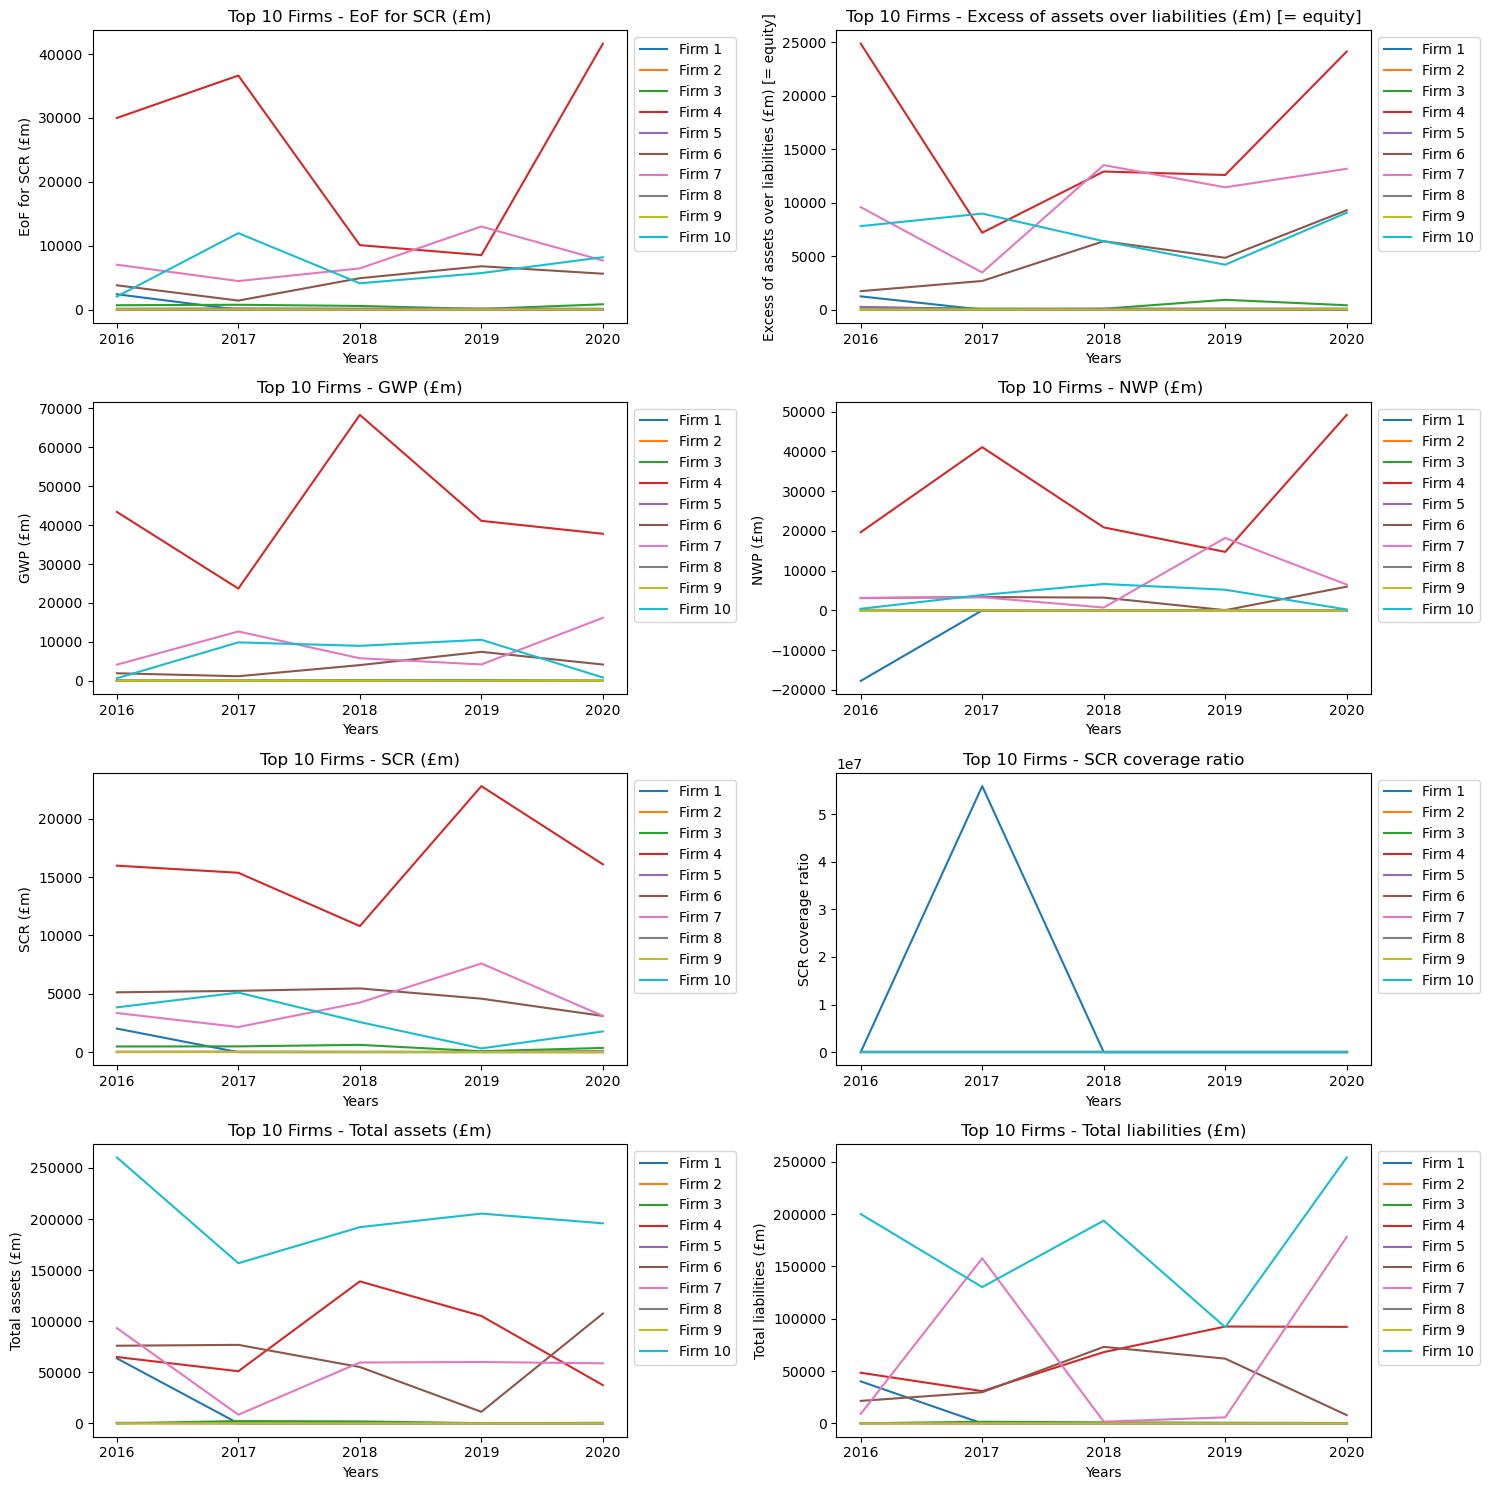

In [10]:
# Set up subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Iterate over each feature and plot the trend for the top 10 firms
for idx, feature in enumerate(data_pivot.columns):
    ax = axes[idx // 2, idx % 2]
    for firm in data_pivot.index.get_level_values('Firms').unique()[:10]:
        ax.plot(data_pivot.loc[firm].index, data_pivot.loc[firm][feature], label=firm)

    ax.set_title(f'Top 10 Firms - {feature}')
    ax.set_xlabel('Years')
    ax.set_ylabel(feature)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()
plt.show()

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Clustering: Grouping firms based on similarity of features</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>We perform K-means clustering on the dataset with a specified number of clusters (n_clusters = 3). The K-means algorithm is used to group the data points into these clusters based on their similarity. The resulting clusters are then visualized through scatter plots for each pair of features, with different colors representing different clusters.</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Below are a set of scatter plots that visually represent how the firms are grouped into clusters based on their features, particularly in relation to 'Total assets (£m)'. Each subplot corresponds to a pair of features, and the points are colored based on the clusters assigned by the K-means algorithm.</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>We can see that all the features are predominantly distributed into one cluster.</strong></p>

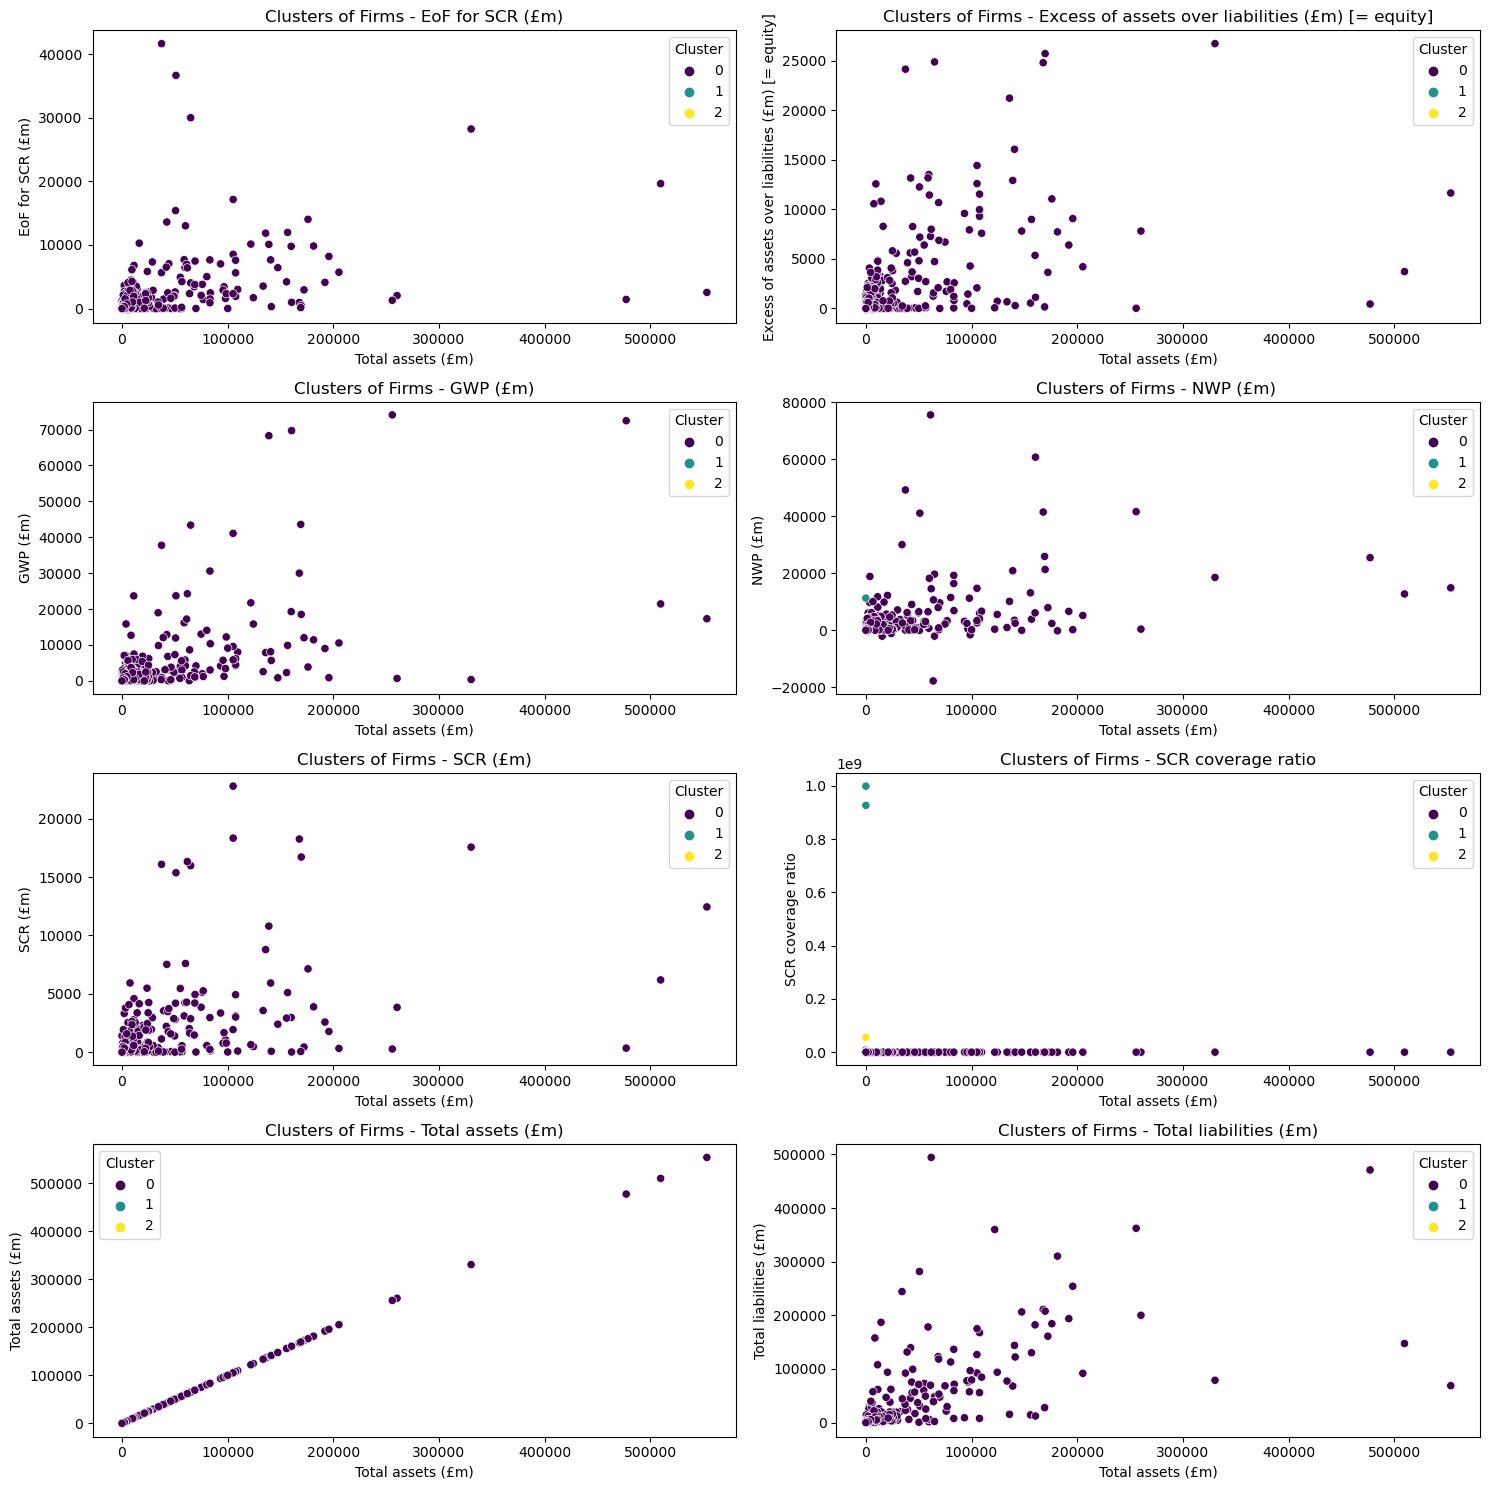

In [11]:
# Set the number of clusters
n_clusters = 3

# Create a KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit and predict clusters
data_clustered = data_pivot.copy()
data_clustered['Cluster'] = kmeans.fit_predict(data_pivot)

# Set up a subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Plot scatter plots for each pair of features
for idx, feature in enumerate(data_pivot.columns):
    ax = axes[idx // 2, idx % 2]
    sns.scatterplot(x='Total assets (£m)', y=feature, hue='Cluster', data=data_clustered, palette='viridis', ax=ax)
    ax.set_title(f'Clusters of Firms - {feature}')
    ax.set_xlabel('Total assets (£m)')
    ax.set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Financial Feature Correlations: Unveiling Relationships in Performance Metrics</strong></p> 

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Explore correlations between different metrics.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Identify which metrics might have a significant impact on others.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Strong positive correlations suggest a relationship where the metrics tend to move in the same direction.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The identified correlations can provide insights into potential dependencies and areas for further investigation.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Weak or near-zero correlations indicate a lack of linear relationship between certain pairs of features.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>The correlation heat-plot reveals the pairwise correlation coefficients between different financial features. Here are some key observations:</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>1. High Positive Correlations:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The pairs 'Excess of assets over liabilities (£m)' and 'SCR (£m)' exhibit a strong positive correlation of approximately 0.86. This indicates that as one of these metrics increases, the other tends to increase as well.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>2. Other Strong Positive Correlations:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Similarly, 'NWP (£m)' and 'GWP (£m)' show a substantial positive correlation of around 0.76.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>'EoF for SCR (£m)' and 'SCR (£m)' have a positive correlation of about 0.76.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>3. Positive Correlations (0.5 to 0.7):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>'Total assets (£m)' and 'Total liabilities (£m)' demonstrate a positive correlation of around 0.69.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Other pairs with positive correlations in the range of 0.5 to 0.7 include 'GWP (£m)' - 'Total liabilities (£m)' and 'SCR (£m)' - 'Total assets (£m)'.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>4. Weak Positive Correlations (0.04 to 0.05):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>'NWP (£m)' and 'SCR coverage ratio' have a weak positive correlation of approximately 0.05.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>5. Weak Negative Correlations (-0.01 to -0.008):</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Some pairs, like 'SCR (£m)' - 'SCR coverage ratio', 'Total assets (£m)' - 'SCR coverage ratio', and 'Excess of assets over liabilities (£m)' - 'SCR coverage ratio', exhibit weak negative correlations.</strong></li>
</ul>

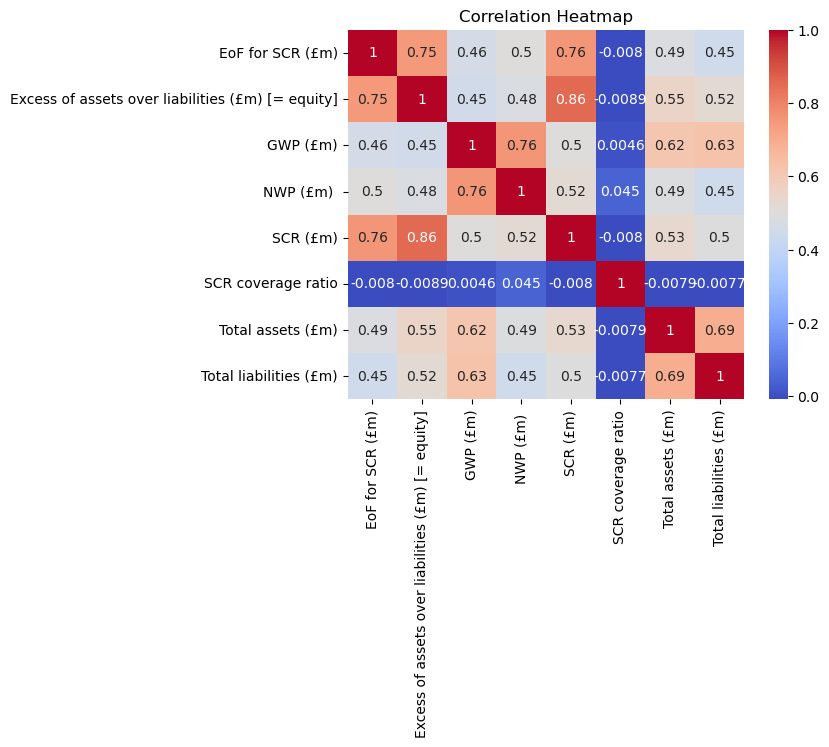

In [12]:
# Example: Correlation heatmap
correlation_matrix = data_pivot.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px; padding: 20px;"><strong>Feature Engineering</strong></p> 

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Calculate relevant metrics based on the provided data.</strong></p>
<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>1. Net Combined Ratio</strong></p>

<p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The 'Net Combined Ratio' is a financial metric that insurance companies often use to assess their financial performance and profitability. Let's break down the components:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Incurred Losses (represented by 'SCR (£m)'): This refers to the total amount of money that an insurance company expects to pay out for claims. It includes the cost of settling insurance claims.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Expenses (represented by 'Total liabilities (£m)'): These are the overall liabilities or financial obligations of the insurance company, which can include various costs like administrative expenses, legal costs, and other financial obligations.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Earned Premiums (represented by 'GWP (£m)'): This is the total amount of money the insurance company earns from selling insurance policies during a specific period.</strong></li>
</ul>

<p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Now, the formula for the 'Net Combined Ratio' is:</strong></p>

<p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>$$ \text{Net Combined Ratio} = \frac{\text{Incurred Losses} + \text{Expenses}} {\text{Earned Premiums}} \times 100 $$</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>2. Create a new column 'Firm Size' in your DataFrame based on the thresholds</strong></p>

In [13]:
# Assuming 'incurred_losses', 'expenses', and 'earned_premiums' are existing columns in your DataFrame
data_pivot['Net Combined Ratio'] = ((data_pivot['SCR (£m)'] + data_pivot['Total liabilities (£m)']) / data_pivot['GWP (£m)']) * 100

# Display the updated DataFrame
data_pivot

EoF for SCR (£m)  \
Firms    Years                     
Firm 1   2016        2416.559785   
         2017           3.796177   
         2018           0.000000   
         2019           0.000000   
         2020           0.000000   
...                          ...   
Firm 325 2016          34.357552   
         2017         390.368084   
         2018         228.364506   
         2019         335.854795   
         2020           0.000000   

                Excess of assets over liabilities (£m) [= equity]    GWP (£m)  \
Firms    Years                                                                  
Firm 1   2016                                         1243.924991   46.768030   
         2017                                            4.398725    0.000000   
         2018                                            0.000000    0.000000   
         2019                                            0.000000    0.000000   
         2020                                            0.000000    0.000000   
...                                                           ...         ...   
Firm 325 2016                                          183.264710  416.840590   
         2017                                          124.780162  268.849304   
         2018                                          632.096113  798.844001   
         2019                                          592.454455  314.507673   
         2020                                            0.000000    0.000000   

                   NWP (£m)       SCR (£m)  SCR coverage ratio  \
Firms    Years                                                   
Firm 1   2016  -17754.100486  2.021322e+03        1.625197e-01   
         2017       0.000000  6.940043e-09        5.588700e+07   
         2018       0.000000  0.000000e+00        0.000000e+00   
         2019       0.000000  0.000000e+00        0.000000e+00   
         2020       0.000000  0.000000e+00        0.000000e+00   
...                      ...           ...                 ...   
Firm 325 2016     108.471899  4.020022e+02        2.528626e+00   
         2017     496.296030  4.082730e+02        1.705165e+00   
         2018     437.217641  4.774236e+02        2.181026e+00   
         2019     120.652291  3.469767e+02        7.520315e-01   
         2020       0.000000  0.000000e+00        0.000000e+00   

                Total assets (£m)  Total liabilities (£m)  Net Combined Ratio  
Firms    Years                                                                 
Firm 1   2016        63676.869102            40171.683156        9.021762e+04  
         2017            9.566096                0.000000                 inf  
         2018            0.000000                0.000000                 NaN  
         2019            0.000000                0.000000                 NaN  
         2020            0.000000                0.000000                 NaN  
...                           ...                     ...                 ...  
Firm 325 2016         2562.232751              673.343922        2.579754e+02  
         2017          526.087601              989.011927        5.197279e+02  
         2018         1006.111747             1762.579368        2.804056e+02  
         2019         2143.411774             1487.323190        5.832290e+02  
         2020            0.000000                0.000000                 NaN  

[1625 rows x 9 columns]

<p style = "font-size : 20px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Handling NaN and inf values in the newly engineered Net Combined Ration field is crucial for accurate analysis. </strong></p>
<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>1. inf Values:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>In the case of 'Net Combined Ratio', where we observe inf values, this suggests that the denominator (GWP (£m)) is zero. we handle this case separately to avoid division by zero.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Here we replace inf values with NaN, indicating that the ratio is undefined in these cases.</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>2. NaN Values:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>For the Net Combined Ratio column, if the values are missing (NaN) for a particular year or firm, we filled them with zeros</strong></li>
</ul>

In [14]:
# Replacing inf with NAN
data_pivot['Net Combined Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Filling NAN with zeros
data_pivot.fillna(0, inplace=True)

In [15]:
# Display the updated DataFrame
data_pivot2 =  data_pivot.copy()
data_pivot2

EoF for SCR (£m)  \
Firms    Years                     
Firm 1   2016        2416.559785   
         2017           3.796177   
         2018           0.000000   
         2019           0.000000   
         2020           0.000000   
...                          ...   
Firm 325 2016          34.357552   
         2017         390.368084   
         2018         228.364506   
         2019         335.854795   
         2020           0.000000   

                Excess of assets over liabilities (£m) [= equity]    GWP (£m)  \
Firms    Years                                                                  
Firm 1   2016                                         1243.924991   46.768030   
         2017                                            4.398725    0.000000   
         2018                                            0.000000    0.000000   
         2019                                            0.000000    0.000000   
         2020                                            0.000000    0.000000   
...                                                           ...         ...   
Firm 325 2016                                          183.264710  416.840590   
         2017                                          124.780162  268.849304   
         2018                                          632.096113  798.844001   
         2019                                          592.454455  314.507673   
         2020                                            0.000000    0.000000   

                   NWP (£m)       SCR (£m)  SCR coverage ratio  \
Firms    Years                                                   
Firm 1   2016  -17754.100486  2.021322e+03        1.625197e-01   
         2017       0.000000  6.940043e-09        5.588700e+07   
         2018       0.000000  0.000000e+00        0.000000e+00   
         2019       0.000000  0.000000e+00        0.000000e+00   
         2020       0.000000  0.000000e+00        0.000000e+00   
...                      ...           ...                 ...   
Firm 325 2016     108.471899  4.020022e+02        2.528626e+00   
         2017     496.296030  4.082730e+02        1.705165e+00   
         2018     437.217641  4.774236e+02        2.181026e+00   
         2019     120.652291  3.469767e+02        7.520315e-01   
         2020       0.000000  0.000000e+00        0.000000e+00   

                Total assets (£m)  Total liabilities (£m)  Net Combined Ratio  
Firms    Years                                                                 
Firm 1   2016        63676.869102            40171.683156        90217.622241  
         2017            9.566096                0.000000            0.000000  
         2018            0.000000                0.000000            0.000000  
         2019            0.000000                0.000000            0.000000  
         2020            0.000000                0.000000            0.000000  
...                           ...                     ...                 ...  
Firm 325 2016         2562.232751              673.343922          257.975381  
         2017          526.087601              989.011927          519.727926  
         2018         1006.111747             1762.579368          280.405563  
         2019         2143.411774             1487.323190          583.228968  
         2020            0.000000                0.000000            0.000000  

[1625 rows x 9 columns]

In [16]:
data_pivot2.columns

Index(['EoF for SCR (£m)', 'Excess of assets over liabilities (£m) [= equity]',
       'GWP (£m)', 'NWP (£m) ', 'SCR (£m)', 'SCR coverage ratio',
       'Total assets (£m)', 'Total liabilities (£m)', 'Net Combined Ratio'],
      dtype='object')

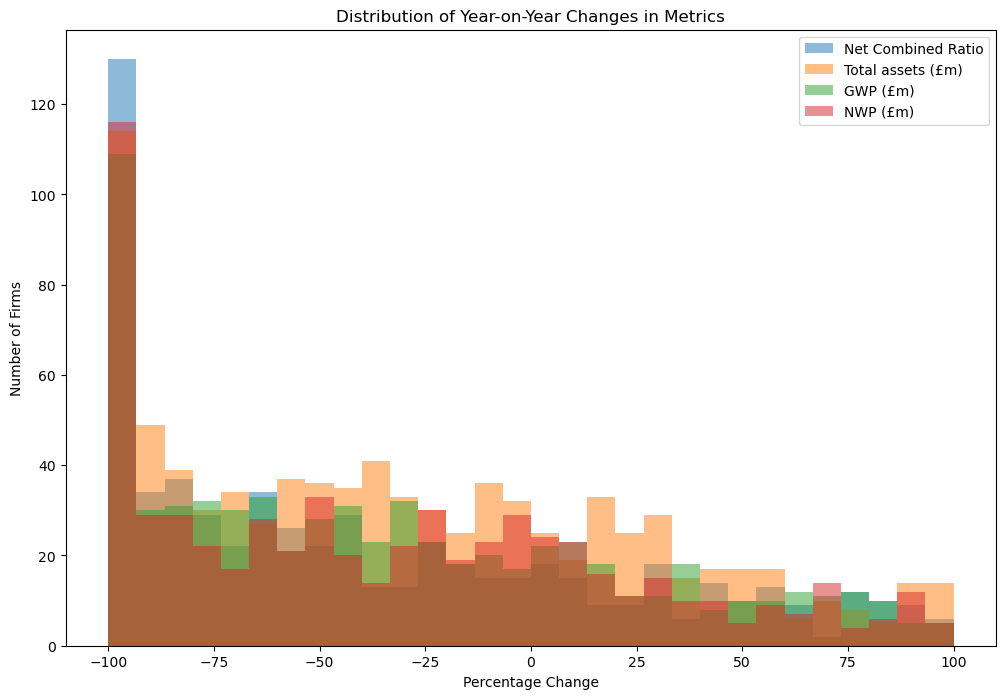

In [19]:
# Assuming 'Net Combined Ratio', 'Total assets (£m)', 'GWP (£m)', 'NWP (£m) ' are relevant metrics
metrics = ['Net Combined Ratio', 'Total assets (£m)', 'GWP (£m)', 'NWP (£m) ']

# Calculate year-on-year percentage changes for each metric
for metric in metrics:
    data_pivot2[f'{metric} YoY Change'] = data_pivot2.groupby('Firms')[metric].pct_change() * 100

# Visualize the distribution of year-on-year changes for each metric
plt.figure(figsize=(12, 8))

for metric in metrics:
    # Set a finite range for the histogram
    finite_range = (-100, 100)  # Adjust the range as needed
    plt.hist(data_pivot2[f'{metric} YoY Change'].dropna(), bins=30, range=finite_range, alpha=0.5, label=metric)

plt.title('Distribution of Year-on-Year Changes in Metrics')
plt.xlabel('Percentage Change')
plt.ylabel('Number of Firms')
plt.legend()
plt.show()

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Firm Size Analysis:</strong></p>
<ul>
    <li style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Examine the distribution of the total assets across firms and visualize this using a histograms.</strong></li>
    <li style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Categorize firms based on their total assets into size groups (small, medium, large).</strong></li>
</ul>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Given the information from the descriptive statistics, a potential approach for categorizing firms into size groups could be:</strong></p>
<ul>
    <li style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Small Firms: Total Assets < Q1 (25th percentile)</strong></li>
    <li style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Medium Firms: Q1 ≤ Total Assets < Q3 (75th percentile).</strong></li>
        <li style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Large Firms: Total Assets ≥ Q3 (75th percentile)</strong></li>
</ul>
    
<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>This threshold-based categorization considers the spread of the data and aims to distinguish firms based on their relative sizes within the dataset. It's essential to validate this approach with domain knowledge and potentially explore alternative methods for determining size groups.</strong></p>

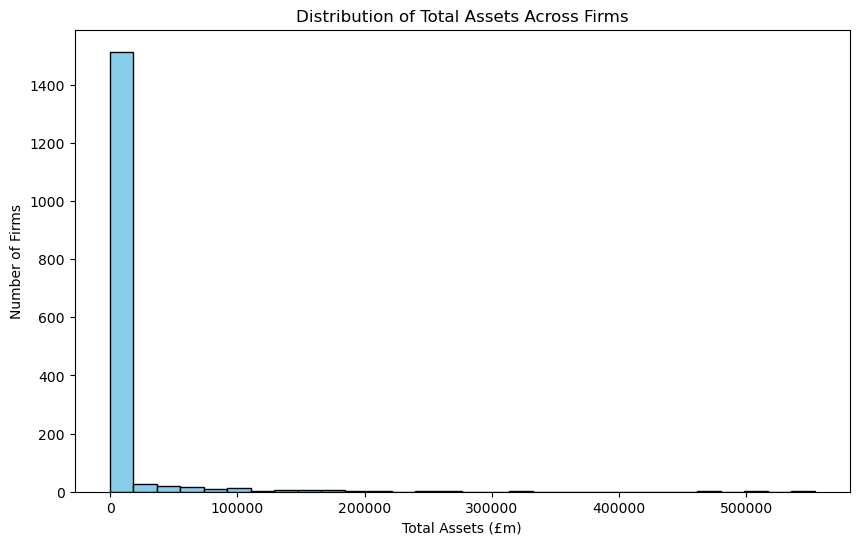

                Total assets (£m) Firm Size
Firms    Years                             
Firm 1   2016        63676.869102     Large
         2017            9.566096    Medium
         2018            0.000000     Small
         2019            0.000000     Small
         2020            0.000000     Small
...                           ...       ...
Firm 325 2016         2562.232751     Large
         2017          526.087601    Medium
         2018         1006.111747     Large
         2019         2143.411774     Large
         2020            0.000000     Small

[1625 rows x 2 columns]


In [20]:
# Assuming 'Total assets (£m)' is the column name for total assets in your DataFrame
total_assets = data_pivot2['Total assets (£m)']

# Plot histogram to examine the distribution
plt.figure(figsize=(10, 6))
plt.hist(total_assets, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Assets Across Firms')
plt.xlabel('Total Assets (£m)')
plt.ylabel('Number of Firms')
plt.show()

# Define size thresholds based on percentiles
small_threshold = total_assets.quantile(0.25)
large_threshold = total_assets.quantile(0.75)

# Create a new column 'Firm Size' in your DataFrame based on the thresholds
data_pivot2['Firm Size'] = np.where(total_assets < small_threshold, 'Small',
                                   np.where(total_assets < large_threshold, 'Medium', 'Large'))

# Display the updated DataFrame with the 'Firm Size' column
print(data_pivot2[['Total assets (£m)', 'Firm Size']])

In [21]:
# Assuming 'Firm Size' is the column name for firm size in your DataFrame
large_firms = data_pivot2[data_pivot2['Firm Size'] == 'Large']

# Display the list of large firms
print("List of Large Firms in the Final Year:")
print(large_firms.loc[large_firms.index.get_level_values('Years') == large_firms.index.get_level_values('Years').max(), ['Total assets (£m)', 'Firm Size']])

List of Large Firms in the Final Year:
                Total assets (£m) Firm Size
Firms    Years                             
Firm 4   2020        37423.543261     Large
Firm 6   2020       107547.787494     Large
Firm 7   2020        58820.101136     Large
Firm 10  2020       195835.579311     Large
Firm 19  2020        11122.875920     Large
...                           ...       ...
Firm 311 2020        61836.611134     Large
Firm 316 2020         1793.992384     Large
Firm 317 2020         8554.845015     Large
Firm 321 2020         8619.920610     Large
Firm 322 2020         4568.891465     Large

[72 rows x 2 columns]


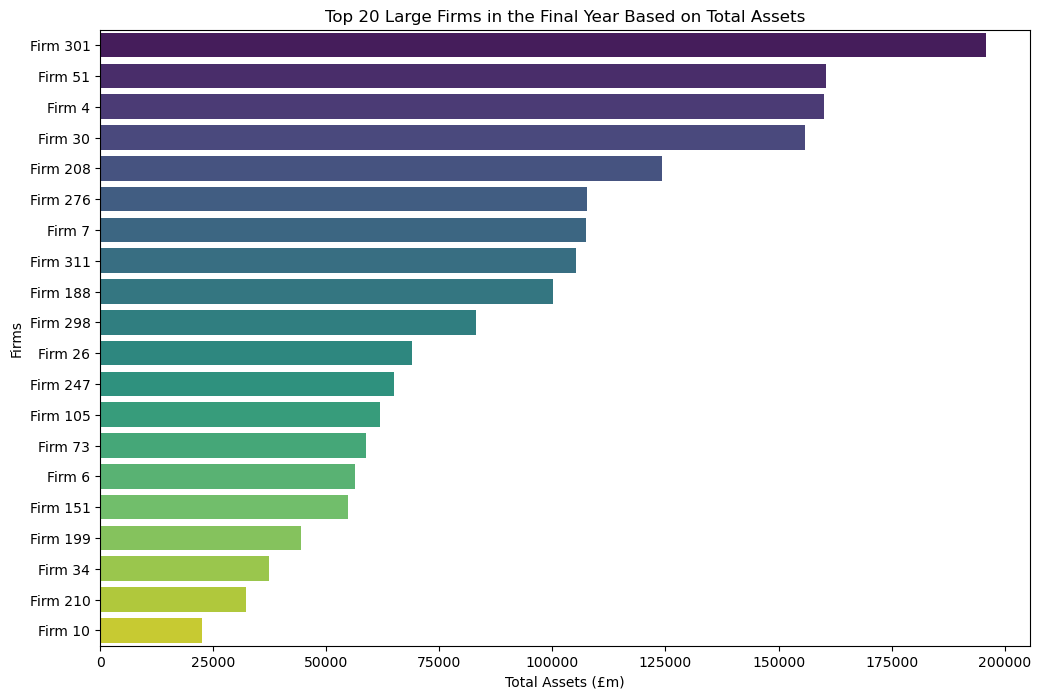

In [22]:
# Display the list of large firms
large_firms_final_year = large_firms.loc[large_firms.index.get_level_values('Years') == large_firms.index.get_level_values('Years').max(), ['Total assets (£m)', 'Firm Size']]

# Sort large firms by total assets in descending order
sorted_large_firms = large_firms_final_year.sort_values(by='Total assets (£m)', ascending=False).head(20)

# Set up the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Total assets (£m)', y=sorted_large_firms.index.get_level_values('Firms')[::-1], data=sorted_large_firms, palette='viridis')

# Set labels and title
plt.xlabel('Total Assets (£m)')
plt.ylabel('Firms')
plt.title('Top 20 Large Firms in the Final Year Based on Total Assets')

# Show the plot
plt.show()

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Conclusion from Data Analysis</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Based on the analysis of large firms, it can be concluded that these firms (top 20 of the 72 firms meeting the threshold for large firms), due to their substantial total assets, are crucial in the insurance landscape. Focusing more attention on large firms is justifiable given their potential impact on the market and their significant role in meeting prudential capital requirements. The supervisory team should closely monitor and engage with these large firms to ensure they continue to operate soundly and contribute to the overall stability of the insurance sector. Additionally, insights gained from the analysis of large firms can inform resource allocation strategies and risk management practices.</strong></p>

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : left; border-radius: 5px 5px; padding: 20px;"><strong>Profit Situation Over Time</strong></p> 

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>The adoption of the rolling average approach in this analysis was driven by the need to balance sensitivity to short-term fluctuations with the identification of long-term trends. The primary goal is to capture the evolving performance of each firm while mitigating the impact of yearly variations.</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Rationale:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Rolling averages effectively smooth out short-term fluctuations, allowing for a clearer view of underlying trends. This is particularly beneficial when aiming to identify the overall trajectory of a firm's performance.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Gain insights into the long-term trends exhibited by each firm over a 5-year period.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Understand the direction and consistency of performance to inform strategic decisions.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Provides a smoothed representation, reducing the impact of short-term fluctuations.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Places more emphasis on recent years, giving higher weight to the latest data points.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Useful for timely decision-making, especially in dynamic environments.</strong></li>
</ul>

In [23]:
# Define the window size for the rolling average
window_size = 5

# Calculate the rolling average for each firm
rolling_average_data = data_pivot.groupby('Firms', group_keys=False).apply(lambda group: group.rolling(window=window_size).mean())

# Drop rows with NaN values (first 4 years for each firm)
rolling_average_data = rolling_average_data.dropna()

# Display the result for the final year
final_year_rolling_average = rolling_average_data.groupby(level=0).last()

# Display the table with rolling averages for the final year
final_year_rolling_average

,EoF for SCR (£m),Excess of assets over liabilities (£m) [= equity],GWP (£m),NWP (£m),SCR (£m),SCR coverage ratio,Total assets (£m),Total liabilities (£m),Net Combined Ratio
Firms,,,,,,,,,
Firm 1,484.071192,249.664743,9.353606,-3550.820097,404.264372,1.117740e+07,12737.287040,8034.336631,18043.524448
Firm 10,6418.094640,7289.002534,6200.639826,3269.048413,2723.500552,1.117433e+00,202066.660573,174085.029726,12702.553530
Firm 100,38.906117,136.325496,24.970503,29.808229,33.993874,1.289590e+00,310.506194,59.201509,446.305750
Firm 101,6744.916512,7730.017707,6633.497544,3687.638236,3692.777909,1.082481e+00,80999.980185,134444.577823,2353.112321
Firm 102,0.750343,2.345276,0.000000,0.000000,0.133054,2.734605e+00,0.634472,0.007267,0.000000
...,...,...,...,...,...,...,...,...,...
Firm 95,18.315167,20.168982,0.006894,0.005174,0.535318,6.122644e+00,18.414717,0.338533,2475.808085
Firm 96,13.869390,50.864090,-0.002047,-0.003039,8.792604,8.688784e-01,43.029574,4.668263,136254.986928
Firm 97,36.641103,54.187096,7.502509,6.194961,23.017781,2.018518e+00,73.702813,45.823483,2628.229124


<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px; padding: 20px;"><strong>Machine Learning</strong></p> 

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>We will attempt to:</strong></p>

<ul>
    <p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>1. Cluster and stratity firms based on their profitability over the five year period.</strong></p>
    <p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>2. Using the clusters created as target, we will attempt to forcast the next years profitability of a firm.</strong></p>
</ul>

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : left; background-color : #bedcfa; border-radius: 5px 5px; padding: 20px;"><strong>K-Means Clustering and Profit Level Stratification</strong></p> 

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>The choice to apply K-Means clustering on the final-year rolling averages and subsequently stratify profit levels aims to categorize firms based on their similar performance trajectories. This approach seeks to identify distinct groups of firms with comparable financial patterns, allowing for targeted and nuanced supervisory attention.</strong></p>

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Rationale:</strong></p>

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>K-Means clustering is employed for unsupervised learning, enabling the algorithm to identify inherent patterns and group similar firms together. This facilitates a more granular understanding of performance dynamics.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The stratification of profit levels based on the Net Combined Ratio offers a pragmatic way to interpret the clustering results. This provides supervisory teams with clear distinctions, such as 'High Profit,' 'Medium Profit,' and 'Low Profit,' aiding in resource allocation.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>The stratification function introduces a nuanced perspective by considering specific thresholds for Net Combined Ratio values. This ensures that the profit levels align with industry standards and offer actionable insights for supervisory decision-making.</strong></li>
</ul>

<p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Overall, this approach facilitates a targeted and efficient supervisory strategy by leveraging machine learning to discern patterns and stratifying firms based on their profitability levels.</strong></p>

In [24]:
# Set the number of clusters
n_clusters = 3

# Set the environment variable to avoid memory leak on Windows
os.environ['OMP_NUM_THREADS'] = '2'

# Create a KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit and predict clusters
data_clustered = final_year_rolling_average.copy()
data_clustered['Cluster'] = kmeans.fit_predict(data_clustered)

# Define a function to stratify profit levels
def stratify_profit(row):
    if row['Net Combined Ratio'] < 100:
        return 'High Profit'
    elif 100 <= row['Net Combined Ratio'] <= 150:
        return 'Medium Profit'
    else:
        return 'Low Profit'

# Apply the stratification function to create the 'Profit Level' column
data_clustered['Profit Level'] = data_clustered.apply(stratify_profit, axis=1)

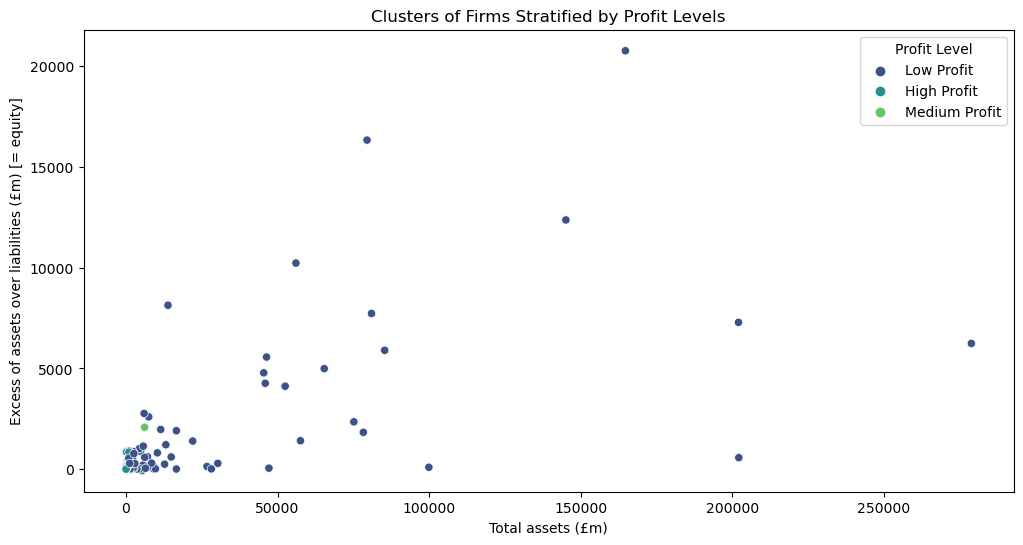

In [25]:
# Visualization of the clustered data

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total assets (£m)', y='Excess of assets over liabilities (£m) [= equity]',
                hue='Profit Level', data=data_clustered, palette='viridis')
plt.title('Clusters of Firms Stratified by Profit Levels')
plt.show()

In [26]:
# Visualizing the updated dataframe
data_clustered

,EoF for SCR (£m),Excess of assets over liabilities (£m) [= equity],GWP (£m),NWP (£m),SCR (£m),SCR coverage ratio,Total assets (£m),Total liabilities (£m),Net Combined Ratio,Cluster,Profit Level
Firms,,,,,,,,,,,
Firm 1,484.071192,249.664743,9.353606,-3550.820097,404.264372,1.117740e+07,12737.287040,8034.336631,18043.524448,0,Low Profit
Firm 10,6418.094640,7289.002534,6200.639826,3269.048413,2723.500552,1.117433e+00,202066.660573,174085.029726,12702.553530,0,Low Profit
Firm 100,38.906117,136.325496,24.970503,29.808229,33.993874,1.289590e+00,310.506194,59.201509,446.305750,0,Low Profit
Firm 101,6744.916512,7730.017707,6633.497544,3687.638236,3692.777909,1.082481e+00,80999.980185,134444.577823,2353.112321,0,Low Profit
Firm 102,0.750343,2.345276,0.000000,0.000000,0.133054,2.734605e+00,0.634472,0.007267,0.000000,0,High Profit
...,...,...,...,...,...,...,...,...,...,...,...
Firm 95,18.315167,20.168982,0.006894,0.005174,0.535318,6.122644e+00,18.414717,0.338533,2475.808085,0,Low Profit
Firm 96,13.869390,50.864090,-0.002047,-0.003039,8.792604,8.688784e-01,43.029574,4.668263,136254.986928,0,Low Profit
Firm 97,36.641103,54.187096,7.502509,6.194961,23.017781,2.018518e+00,73.702813,45.823483,2628.229124,0,Low Profit


<p style = "font-size : 20px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Showing the proportion of firms in each profit level </strong></p>
<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>218 firms were identified as low profitting over the 5 year period, accounting for 67.0 percent of the entire firms being examined.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>93 firms were identified as high profitting over the 5 year period, accounting for 28.6 percent of the entire firms being examined.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>14 firms were identified as medium profitting over the 5 year period, accounting for 4.3 percent of the entire firms being examined.</strong></li>
</ul>

In [27]:
# Count of firms in each profit level
profit_level_counts = data_clustered['Profit Level'].value_counts()

# Proportion of firms in each profit level
profit_level_proportions = data_clustered['Profit Level'].value_counts(normalize=True)

# Combine the count and proportion into a DataFrame
profit_level_df = pd.DataFrame({
    'Count': profit_level_counts,
    'Proportion': profit_level_proportions
})

# Display the DataFrame
print(profit_level_df)

               Count  Proportion
Low Profit       218    0.670769
High Profit       93    0.286154
Medium Profit     14    0.043077


<p style = "font-size : 25px; color : white ; font-family : 'Comic Sans MS'; text-align : left; background-color : #fF0000; border-radius: 5px 5px; padding: 20px;"><strong>LOW PROFITING FIRMS</strong></p> 

<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Asides the large firms identified earlier as the most requiring of supervisory attention, here we highlight low profiting firms that should receive attention as well, for improved profitability. </strong></p>

In [28]:
# Filter the DataFrame for firms with low profits
low_profit_firms = data_clustered[data_clustered['Profit Level'] == 'Low Profit']

# Display the table with firms identified as low profiting
low_profit_firms

,EoF for SCR (£m),Excess of assets over liabilities (£m) [= equity],GWP (£m),NWP (£m),SCR (£m),SCR coverage ratio,Total assets (£m),Total liabilities (£m),Net Combined Ratio,Cluster,Profit Level
Firms,,,,,,,,,,,
Firm 1,484.071192,249.664743,9.353606,-3550.820097,404.264372,1.117740e+07,12737.287040,8034.336631,18043.524448,0,Low Profit
Firm 10,6418.094640,7289.002534,6200.639826,3269.048413,2723.500552,1.117433e+00,202066.660573,174085.029726,12702.553530,0,Low Profit
Firm 100,38.906117,136.325496,24.970503,29.808229,33.993874,1.289590e+00,310.506194,59.201509,446.305750,0,Low Profit
Firm 101,6744.916512,7730.017707,6633.497544,3687.638236,3692.777909,1.082481e+00,80999.980185,134444.577823,2353.112321,0,Low Profit
Firm 104,36.958387,35.184321,4811.911353,5363.835025,4.442626,8.526589e+00,5292.656986,10562.983938,388.453523,0,Low Profit
...,...,...,...,...,...,...,...,...,...,...,...
Firm 93,55.501189,64.912390,22.007594,2.792255,28.701133,3.032636e+00,200.850666,94.637975,57223.090904,0,Low Profit
Firm 95,18.315167,20.168982,0.006894,0.005174,0.535318,6.122644e+00,18.414717,0.338533,2475.808085,0,Low Profit
Firm 96,13.869390,50.864090,-0.002047,-0.003039,8.792604,8.688784e-01,43.029574,4.668263,136254.986928,0,Low Profit


<p style = "font-size : 20px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Visualizing Net Combined Ratio of Bottom 50 Firms in Terms of Profitability.</strong></p>
<p style = "font-size : 15px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>This visualization aids in identifying and understanding the profitability distribution among the bottom 50 firms, helping stakeholders make informed decisions based on the presented data.</strong></p>

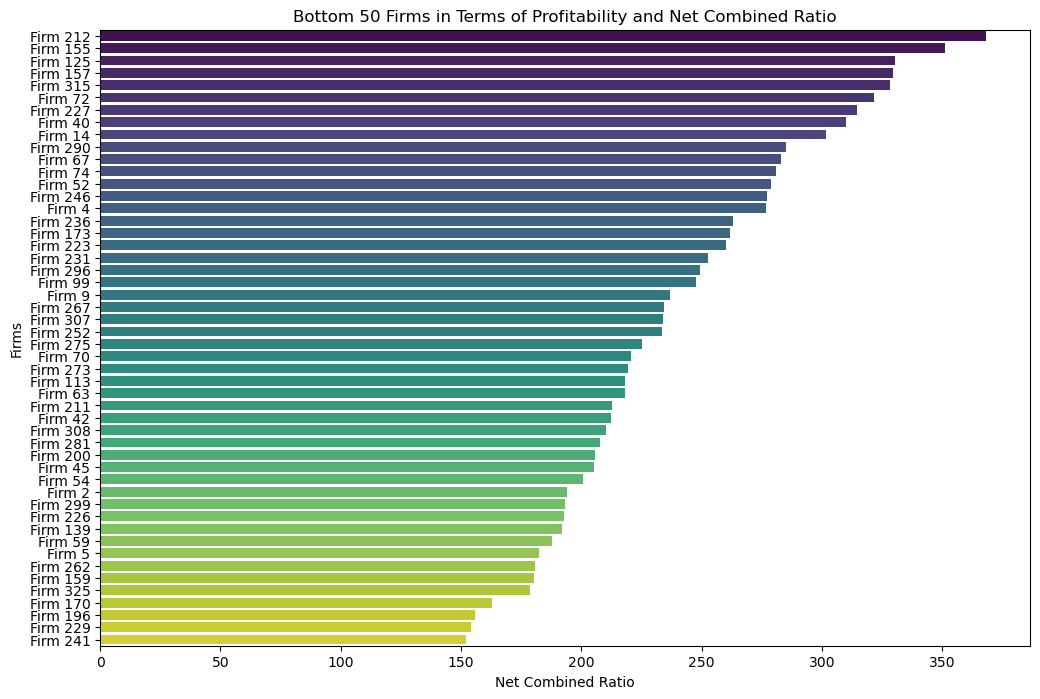

In [29]:
# Sort the low-profit firms by Net Combined Ratio
sorted_low_profit_firms = low_profit_firms.sort_values(by='Net Combined Ratio', ascending=False).tail(50)

# Set up the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Net Combined Ratio', y=sorted_low_profit_firms.index[::-1], data=sorted_low_profit_firms, palette='viridis')

# Set labels and title
plt.xlabel('Net Combined Ratio')
plt.ylabel('Firms')
plt.title('Bottom 50 Firms in Terms of Profitability and Net Combined Ratio')

# Show the plot
plt.show()

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : left; background-color : #bedcfa; border-radius: 5px 5px; padding: 20px;"><strong>Forcasting Firm Profitability</strong></p> 

<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Data preparation and feature engineering</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>We Encode the categorical target variable ('High Profit', 'Medium Profit', 'Low Profit') into numerical values (0, 1, 2).</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>We create a lag features, which is the Profit Level values shifted by one year. These can serve as predictors for the next year.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Choose a suitable classification algorithm, such as Decision Tree Classifier, Random Forest Classifier, or Gradient Boosting Classifier.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Evaluate the model's performance on the testing set using appropriate metrics (e.g., accuracy, precision, recall, F1-score).</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Optimize the model's hyperparameters to improve performance.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>If possible, perform cross-validation to ensure the model's robustness.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Use the trained model to predict the Profit Level for the next year.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Visualize the predicted values against the actual values to assess the model's accuracy.</strong></li>
</ul>

In [30]:
# Fit and predict clusters
forcast_df = data_pivot.copy()

# Define a function to stratify profit levels
def stratify_profit(row):
    if row['Net Combined Ratio'] < 100:
        return 'High Profit'
    elif 100 <= row['Net Combined Ratio'] <= 150:
        return 'Medium Profit'
    else:
        return 'Low Profit'

# Apply the stratification function to create the 'Profit Level' column
forcast_df['Profit Level'] = forcast_df.apply(stratify_profit, axis=1)

In [31]:
forcast_df

EoF for SCR (£m)  \
Firms    Years                     
Firm 1   2016        2416.559785   
         2017           3.796177   
         2018           0.000000   
         2019           0.000000   
         2020           0.000000   
...                          ...   
Firm 325 2016          34.357552   
         2017         390.368084   
         2018         228.364506   
         2019         335.854795   
         2020           0.000000   

                Excess of assets over liabilities (£m) [= equity]    GWP (£m)  \
Firms    Years                                                                  
Firm 1   2016                                         1243.924991   46.768030   
         2017                                            4.398725    0.000000   
         2018                                            0.000000    0.000000   
         2019                                            0.000000    0.000000   
         2020                                            0.000000    0.000000   
...                                                           ...         ...   
Firm 325 2016                                          183.264710  416.840590   
         2017                                          124.780162  268.849304   
         2018                                          632.096113  798.844001   
         2019                                          592.454455  314.507673   
         2020                                            0.000000    0.000000   

                   NWP (£m)       SCR (£m)  SCR coverage ratio  \
Firms    Years                                                   
Firm 1   2016  -17754.100486  2.021322e+03        1.625197e-01   
         2017       0.000000  6.940043e-09        5.588700e+07   
         2018       0.000000  0.000000e+00        0.000000e+00   
         2019       0.000000  0.000000e+00        0.000000e+00   
         2020       0.000000  0.000000e+00        0.000000e+00   
...                      ...           ...                 ...   
Firm 325 2016     108.471899  4.020022e+02        2.528626e+00   
         2017     496.296030  4.082730e+02        1.705165e+00   
         2018     437.217641  4.774236e+02        2.181026e+00   
         2019     120.652291  3.469767e+02        7.520315e-01   
         2020       0.000000  0.000000e+00        0.000000e+00   

                Total assets (£m)  Total liabilities (£m)  Net Combined Ratio  \
Firms    Years                                                                  
Firm 1   2016        63676.869102            40171.683156        90217.622241   
         2017            9.566096                0.000000            0.000000   
         2018            0.000000                0.000000            0.000000   
         2019            0.000000                0.000000            0.000000   
         2020            0.000000                0.000000            0.000000   
...                           ...                     ...                 ...   
Firm 325 2016         2562.232751              673.343922          257.975381   
         2017          526.087601              989.011927          519.727926   
         2018         1006.111747             1762.579368          280.405563   
         2019         2143.411774             1487.323190          583.228968   
         2020            0.000000                0.000000            0.000000   

               Profit Level  
Firms    Years               
Firm 1   2016    Low Profit  
         2017   High Profit  
         2018   High Profit  
         2019   High Profit  
         2020   High Profit  
...                     ...  
Firm 325 2016    Low Profit  
         2017    Low Profit  
         2018    Low Profit  
         2019    Low Profit  
         2020   High Profit  

[1625 rows x 10 columns]

In [32]:
# Count of firms in each profit level
profit_level_counts = forcast_df['Profit Level'].value_counts()

# Proportion of firms in each profit level
profit_level_proportions = forcast_df['Profit Level'].value_counts(normalize=True)

# Combine the count and proportion into a DataFrame
profit_level_df = pd.DataFrame({
    'Count': profit_level_counts,
    'Proportion': profit_level_proportions
})

# Display the DataFrame
print(profit_level_df)

               Count  Proportion
Low Profit       803    0.494154
High Profit      738    0.454154
Medium Profit     84    0.051692


<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; text-align : left; border-radius: 5px 5px; padding: 20px;"><strong>Data Preprocessing</strong></p> 

In [33]:
# Encode the target variable
target_mapping = {'High Profit': 0, 'Medium Profit': 1, 'Low Profit': 2}
forcast_df['Encoded_Profit_Level'] = forcast_df['Profit Level'].map(target_mapping)

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Adding a target column:</strong></p>
<p style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Defining a function to add a new column, that will show result of the outcome in the next year</strong></p>

In [34]:
"""Engineering a new target label - Target"""

def add_target(group):
    group["Target"] = group["Encoded_Profit_Level"].shift(-1)
    return group

forcast_df = forcast_df .groupby("Firms").apply(add_target)

In [35]:
forcast_df

EoF for SCR (£m)  \
Firms    Years                     
Firm 1   2016        2416.559785   
         2017           3.796177   
         2018           0.000000   
         2019           0.000000   
         2020           0.000000   
...                          ...   
Firm 325 2016          34.357552   
         2017         390.368084   
         2018         228.364506   
         2019         335.854795   
         2020           0.000000   

                Excess of assets over liabilities (£m) [= equity]    GWP (£m)  \
Firms    Years                                                                  
Firm 1   2016                                         1243.924991   46.768030   
         2017                                            4.398725    0.000000   
         2018                                            0.000000    0.000000   
         2019                                            0.000000    0.000000   
         2020                                            0.000000    0.000000   
...                                                           ...         ...   
Firm 325 2016                                          183.264710  416.840590   
         2017                                          124.780162  268.849304   
         2018                                          632.096113  798.844001   
         2019                                          592.454455  314.507673   
         2020                                            0.000000    0.000000   

                   NWP (£m)       SCR (£m)  SCR coverage ratio  \
Firms    Years                                                   
Firm 1   2016  -17754.100486  2.021322e+03        1.625197e-01   
         2017       0.000000  6.940043e-09        5.588700e+07   
         2018       0.000000  0.000000e+00        0.000000e+00   
         2019       0.000000  0.000000e+00        0.000000e+00   
         2020       0.000000  0.000000e+00        0.000000e+00   
...                      ...           ...                 ...   
Firm 325 2016     108.471899  4.020022e+02        2.528626e+00   
         2017     496.296030  4.082730e+02        1.705165e+00   
         2018     437.217641  4.774236e+02        2.181026e+00   
         2019     120.652291  3.469767e+02        7.520315e-01   
         2020       0.000000  0.000000e+00        0.000000e+00   

                Total assets (£m)  Total liabilities (£m)  Net Combined Ratio  \
Firms    Years                                                                  
Firm 1   2016        63676.869102            40171.683156        90217.622241   
         2017            9.566096                0.000000            0.000000   
         2018            0.000000                0.000000            0.000000   
         2019            0.000000                0.000000            0.000000   
         2020            0.000000                0.000000            0.000000   
...                           ...                     ...                 ...   
Firm 325 2016         2562.232751              673.343922          257.975381   
         2017          526.087601              989.011927          519.727926   
         2018         1006.111747             1762.579368          280.405563   
         2019         2143.411774             1487.323190          583.228968   
         2020            0.000000                0.000000            0.000000   

               Profit Level  Encoded_Profit_Level  Target  
Firms    Years                                             
Firm 1   2016    Low Profit                     2     0.0  
         2017   High Profit                     0     0.0  
         2018   High Profit                     0     0.0  
         2019   High Profit                     0     0.0  
         2020   High Profit                     0     NaN  
...                     ...                   ...     ...  
Firm 325 2016    Low Profit                     2     2.0  
         2017    Low Profit             

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Handle the missing values in our new target column:</strong></p>
<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>Since there is no data on outcome of the next period, we have instances of NAN in our target.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>All NAN's created as a result of shifting are given a place holder 3. This value holds until fresh data is generated, preprocessed and updated for the coming period.</strong></li>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>We then convert the target column to integers.</strong></li>
</ul>

In [36]:
# Replace missing values in "target" column with 3
forcast_df.loc[pd.isnull(forcast_df["Target"]), "Target"] = 3

# Convert "TARGET" column to integers
forcast_df["Target"] = forcast_df["Target"].astype(int, errors="ignore")

In [37]:
forcast_df

EoF for SCR (£m)  \
Firms    Years                     
Firm 1   2016        2416.559785   
         2017           3.796177   
         2018           0.000000   
         2019           0.000000   
         2020           0.000000   
...                          ...   
Firm 325 2016          34.357552   
         2017         390.368084   
         2018         228.364506   
         2019         335.854795   
         2020           0.000000   

                Excess of assets over liabilities (£m) [= equity]    GWP (£m)  \
Firms    Years                                                                  
Firm 1   2016                                         1243.924991   46.768030   
         2017                                            4.398725    0.000000   
         2018                                            0.000000    0.000000   
         2019                                            0.000000    0.000000   
         2020                                            0.000000    0.000000   
...                                                           ...         ...   
Firm 325 2016                                          183.264710  416.840590   
         2017                                          124.780162  268.849304   
         2018                                          632.096113  798.844001   
         2019                                          592.454455  314.507673   
         2020                                            0.000000    0.000000   

                   NWP (£m)       SCR (£m)  SCR coverage ratio  \
Firms    Years                                                   
Firm 1   2016  -17754.100486  2.021322e+03        1.625197e-01   
         2017       0.000000  6.940043e-09        5.588700e+07   
         2018       0.000000  0.000000e+00        0.000000e+00   
         2019       0.000000  0.000000e+00        0.000000e+00   
         2020       0.000000  0.000000e+00        0.000000e+00   
...                      ...           ...                 ...   
Firm 325 2016     108.471899  4.020022e+02        2.528626e+00   
         2017     496.296030  4.082730e+02        1.705165e+00   
         2018     437.217641  4.774236e+02        2.181026e+00   
         2019     120.652291  3.469767e+02        7.520315e-01   
         2020       0.000000  0.000000e+00        0.000000e+00   

                Total assets (£m)  Total liabilities (£m)  Net Combined Ratio  \
Firms    Years                                                                  
Firm 1   2016        63676.869102            40171.683156        90217.622241   
         2017            9.566096                0.000000            0.000000   
         2018            0.000000                0.000000            0.000000   
         2019            0.000000                0.000000            0.000000   
         2020            0.000000                0.000000            0.000000   
...                           ...                     ...                 ...   
Firm 325 2016         2562.232751              673.343922          257.975381   
         2017          526.087601              989.011927          519.727926   
         2018         1006.111747             1762.579368          280.405563   
         2019         2143.411774             1487.323190          583.228968   
         2020            0.000000                0.000000            0.000000   

               Profit Level  Encoded_Profit_Level  Target  
Firms    Years                                             
Firm 1   2016    Low Profit                     2       0  
         2017   High Profit                     0       0  
         2018   High Profit                     0       0  
         2019   High Profit                     0       0  
         2020   High Profit                     0       3  
...                     ...                   ...     ...  
Firm 325 2016    Low Profit                     2       2  
         2017    Low Profit             

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Model Selection & Hyperparameter Tunning:</strong></p>

In [38]:
%%time
# Separating our target from other feature variable
features = ['EoF for SCR (£m)', 'Excess of assets over liabilities (£m) [= equity]',
            'GWP (£m)', 'NWP (£m) ', 'SCR (£m)', 'SCR coverage ratio',
            'Total assets (£m)', 'Total liabilities (£m)', 'Net Combined Ratio']

target = 'Target'

# Define the TimeSeriesSplit for cross-validation
split = TimeSeriesSplit(n_splits=3)

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a list of classifiers
classifiers = [
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Loop through each classifier and build the pipeline
for classifier_name, classifier in classifiers:
    # Initialize the classifier
    classifier_instance = classifier

    # Initialize the SequentialFeatureSelector
    sfs = SequentialFeatureSelector(classifier_instance,  # Use the classifier as the model
                                    n_features_to_select=5,
                                    direction="forward",
                                    cv=split,
                                    n_jobs=1
                                    )

    # Create the pipeline
    pipeline = Pipeline([
        ('scaler', scaler),
        ('feature_selector', sfs),
        ('classifier', classifier_instance)
    ])

    # Define the hyperparameters grid for the classifier
    param_grid = {}

    if classifier_name == 'SVM':
        param_grid = {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }

    elif classifier_name == 'Random Forest':
        param_grid = {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20, 30],
        }

    elif classifier_name == 'Logistic Regression':
        param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
        }

    elif classifier_name == 'KNN':
        param_grid = {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2]
        }

    elif classifier_name == 'Naive Bayes':
        param_grid = {}

    elif classifier_name == 'Gradient Boosting':
        param_grid = {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7]
        }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=split, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV on the data
    grid_search.fit(forcast_df[forcast_df[target] != 3][features], forcast_df[forcast_df[target] != 3][target])

    # Get the best parameters and accuracy score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"\nResults for {classifier_name}:")
    print(f"Best Hyperparameters: {best_params}")
    print(f"Best Accuracy Score: {best_score}\n")


Results for SVM:
Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Best Accuracy Score: 0.556923076923077


Results for Random Forest:
Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best Accuracy Score: 0.722051282051282


Results for Logistic Regression:
Best Hyperparameters: {'classifier__C': 100}
Best Accuracy Score: 0.5641025641025642


Results for KNN:
Best Hyperparameters: {'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Best Accuracy Score: 0.681025641025641


Results for Naive Bayes:
Best Hyperparameters: {}
Best Accuracy Score: 0.4871794871794872


Results for Gradient Boosting:
Best Hyperparameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best Accuracy Score: 0.7353846153846154

CPU times: total: 1min 30s
Wall time: 37min 47s


<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>The Gradient Boosting Classifier have been identified as my optimal model with over 74% accuracy</strong></p>
<ul>
    <li style = "color : #34656d ; font-family : 'Comic Sans MS';"><strong>This will be applied to our backtest function as our model of choice for forcasting the profitability of a firm in the comin year</strong></li>
</ul>

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Prediction & Metrics Evaluation:</strong></p>

We adopt the use of a backtest approach which is typically used to assess the performance of a predictive model by simulating its predictions on historical data. In this section, using the backtest method, we attampt to train and evaluate our machine learning models on our dataset related to financial forecasting. Below is a summary of the backtest approach, and its objectives:

   
 Objective:

The primary objective of the backtest function is to assess the performance of machine learning models in predicting the target variable based on historical financial data. The function accomplishes this through the following steps:

    Data Splitting:
        The historical data (forcast_df) is split into training and testing sets using the specified test_size.

    Model Training:
        For Gradient Boosting classifier - my optimal classifier.

    Model Evaluation:
        The selected model is evaluated on the testing set.
        The accuracy score on the testing set is printed.

    Results Display:
        For each classifier, the best hyperparameters and accuracy score are printed.

In [45]:
# Define the GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3)

# Define the TimeSeriesSplit for cross-validation
split = TimeSeriesSplit(n_splits=3)

# Initialize the SequentialFeatureSelector with the GB classifier
sfs = SequentialFeatureSelector(gradient_boosting,  # Use GB as the model
                                n_features_to_select=5,
                                direction="forward",
                                cv=split,
                                n_jobs=1
                                )

# Assuming features is a DataFrame with your predictor variables
# Make sure to replace "forcast_df[features]" with the actual DataFrame containing your features
sfs.fit(forcast_df[features], forcast_df["Target"])

# Get the selected features
selected_features = list(forcast_df[features].columns[sfs.get_support()])
print(selected_features)

['Excess of assets over liabilities (£m) [= equity]', 'NWP (£m) ', 'SCR coverage ratio', 'Total liabilities (£m)', 'Net Combined Ratio']


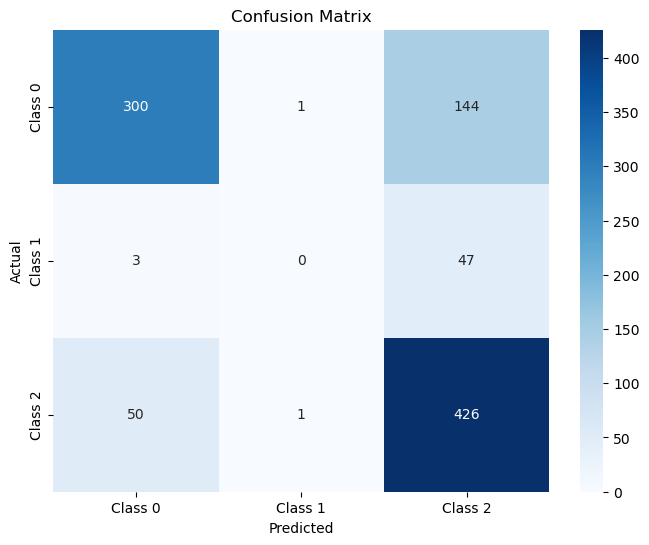

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.67      0.75       445
           1       0.00      0.00      0.00        50
           2       0.69      0.89      0.78       477

    accuracy                           0.75       972
   macro avg       0.51      0.52      0.51       972
weighted avg       0.73      0.75      0.73       972



In [67]:
# Assuming you already have selected features and target variable
selected_features = list(forcast_df[features].columns[sfs.get_support()])
target_variable = 'Target'

# Define the time series split
split = TimeSeriesSplit(n_splits=3)

# Initialize the GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3)

# Initialize lists to store results
all_predictions = []
accuracy_scores = []

# Manual backtest loop
for train_index, test_index in split.split(forcast_df):
    train_data = forcast_df.iloc[train_index]
    test_data = forcast_df.iloc[test_index]

    X_train = train_data[selected_features]
    y_train = train_data[target_variable]
    X_test = test_data[selected_features]
    y_test = test_data[target_variable]

    # Fit the model
    gradient_boosting.fit(X_train, y_train)

    # Make predictions
    y_pred = gradient_boosting.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Store predictions
    predictions = pd.DataFrame({
        'actual': y_test.values,
        'predicted': y_pred
    })
    all_predictions.append(predictions)

# Concatenate all predictions
predictions_df = pd.concat(all_predictions)

# Exclude rows where either the actual or predicted value is 3
predictions_df = predictions_df[(predictions_df['actual'] != 3) & (predictions_df['predicted'] != 3)]

# Calculate mean accuracy
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Generate classification report
class_report = classification_report(predictions_df['actual'], predictions_df['predicted'])

# # Generate confusion matrix
# conf_matrix = confusion_matrix(predictions_df['actual'], predictions_df['predicted'])

# Generate confusion matrix
conf_matrix = confusion_matrix(predictions_df['actual'], predictions_df['predicted'])

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Print or use the results as needed
# print("Mean Accuracy:", mean_accuracy)
print("Classification Report:\n", class_report)
# print("Confusion Matrix:\n", conf_matrix)

<p style = "font-size : 25px; color : #4e8d7c ; font-family : 'Comic Sans MS'; border-radius: 5px 5px; padding: 20px;"><strong>Conclusion from performance metrices</strong></p>

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>The classification report provides a detailed overview of the performance of a classification model. Below is a break down the key metrics in your classification report:</strong></p>

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Precision:</strong></p>


    
        Precision is the ratio of correctly predicted positive observations to the total predicted positives.
        Class 0 (High profit): 85% precision means that when the model predicts a high profit, it is correct 85% of the time.
        Class 1 (Medium profit): 0% precision indicates that the model did not correctly predict any instances of medium profit. This is likely due to the absence of true positives for this class.
        Class 2 (Low profit): 69% precision means that when the model predicts a low profit, it is correct 69% of the time.

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Recall (Sensitivity):</strong></p>
    
        Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
        Class 0 (High profit): 67% recall means that the model correctly identified 67% of the actual high-profit instances.
        Class 1 (Medium profit): 0% recall indicates that the model did not identify any instances of medium profit. This suggests that the model is not capturing instances of medium profit well.
        Class 2 (Low profit): 90% recall means that the model correctly identified 90% of the actual low-profit instances.

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>F1-Score:</strong></p>
    
        The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
        Class 0 (High profit): F1-score is 0.75, indicating a reasonable balance between precision and recall for high profit.
        Class 1 (Medium profit): F1-score is 0.00, which is consistent with the low precision and recall. This class is not effectively captured by the model.
        Class 2 (Low profit): F1-score is 0.78, indicating a good balance between precision and recall for low profit.

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Support:</strong></p>

        The number of actual occurrences of each class in the specified dataset.
        Class 0 (High profit): There are 445 instances of high profit in the dataset.
        Class 1 (Medium profit): There are 50 instances of medium profit in the dataset.
        Class 2 (Low profit): There are 477 instances of low profit in the dataset.

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Accuracy:</strong></p>

        Overall accuracy of the model in predicting all classes.
        The model has an accuracy of 75%, meaning it correctly predicted the class for 75% of the instances.

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Macro Avg / Weighted Avg:</strong></p>

        Macro average takes the average of the metrics for each class without considering class imbalance.
        Weighted average considers the number of samples for each class.
        In this case, macro and weighted averages are close, indicating that the class distribution does not heavily impact the overall performance metrics.


<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Interpretation:</strong></p>

    The model performs reasonably well for the "High profit" and "Low profit" classes, with good precision and recall.
    However, the model struggles with the "Medium profit" class, as indicated by the 0% precision and recall. This suggests that the model is not effectively identifying instances of medium profit, possibly due to imbalanced data or insufficient features for this class.
    The overall accuracy of 75% indicates that the model is making correct predictions for the majority of instances, but it's important to consider the class-specific metrics for a more detailed understanding.

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>In summary, while the model shows promise for certain classes, further investigation into the challenges with the "Medium profit" class may be necessary to improve overall model performance.</strong></p>

### Feature Importance

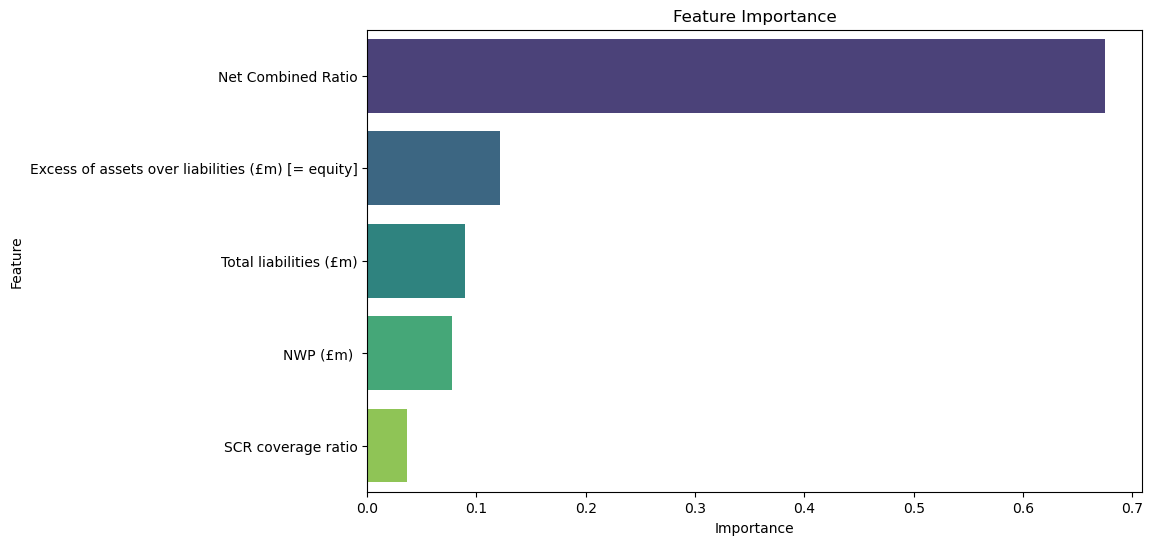

In [74]:
# Fit the model
gradient_boosting.fit(X_train, y_train)

# Get feature importances
feature_importance = gradient_boosting.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

In [75]:
feature_importance_df

,Feature,Importance
4,Net Combined Ratio,0.675084
0,Excess of assets over liabilities (£m) [= equity],0.121573
3,Total liabilities (£m),0.089320
1,NWP (£m),0.077425
2,SCR coverage ratio,0.036598


The feature importance values provide insights into how much each feature contributes to the predictive performance of your Gradient Boosting model. Here's an interpretation of the results:

    Net Combined Ratio (0.675):
        This feature has the highest importance score, indicating that it plays a dominant role in the model's predictions. A high value suggests that changes in this feature strongly influence the model's output.

    Excess of Assets over Liabilities (Equity) (0.122):
        This feature has a moderate importance score. While not as influential as the Net Combined Ratio, it still significantly contributes to the model's predictions.

    Total Liabilities (0.089):
        This feature has a lower importance compared to the first two but is still a meaningful contributor to the model's predictions. Changes in this feature contribute to the model's output, but to a lesser extent.

    NWP (Net Written Premium) (0.077):
        This feature has a similar importance to Total Liabilities. It contributes to the model's predictions, but its impact is not as strong as the top features.

    SCR (Solvency Capital Requirement) Coverage Ratio (0.037):
        This feature has the lowest importance among the selected features. Changes in this feature have the least impact on the model's predictions.

In summary, the Net Combined Ratio is the most critical feature for your model, followed by Excess of Assets over Liabilities, Total Liabilities, Net Written Premium, and finally, the Solvency Capital Requirement Coverage Ratio. These importance scores can help you prioritize and focus on the most influential factors when interpreting or improving your model.

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px; padding: 20px;"><strong>Task III</strong></p> 

Building an end-to-end data processing and analytics pipeline on the cloud, specifically using Microsoft Azure, involves various services and considerations. Below is a general outline of the components and considerations for such a pipeline:

**Components of the Data Processing and Analytics Pipeline:**

    Data Ingestion:
        Use Azure Data Factory: This service allows you to create, schedule, and manage data pipelines that can move data between supported data stores. It supports batch processing and can ingest data from various sources.

    Data Storage:
        Azure Data Lake Storage: Store raw and processed data in Azure Data Lake Storage for scalable and secure data storage. It allows you to store any type of data and perform analytics on it.

    Data Processing:
        Azure Databricks: Utilize Databricks for big data analytics and processing. It provides a collaborative environment with Apache Spark clusters to process large datasets efficiently.

    Data Transformation:
        Azure HDInsight: For distributed data processing, use HDInsight with Apache Spark or Apache Hive for data transformation and preparation.

    Feature Engineering:
        Azure Machine Learning: Incorporate Azure ML services for feature engineering and model training. It supports various machine learning frameworks and tools.

    Model Training and Deployment:
        Azure Machine Learning: Train and deploy machine learning models using Azure ML. This service supports the end-to-end machine learning lifecycle.

    Batch Scoring:
        Azure Machine Learning or Azure Databricks: For batch scoring, use the deployed model in Azure ML or integrate it into the Databricks pipeline.

    Monitoring and Logging:
        Azure Monitor and Azure Log Analytics: Monitor the health and performance of the pipeline. Use Log Analytics for log management and analysis.

    Visualization and Reporting:
        Power BI: Create interactive reports and dashboards using Power BI to visualize the processed data and model predictions.

Considerations:

    Scalability:
        Ensure the pipeline is designed to scale horizontally to handle growing data volumes.

    Security:
        Implement Azure Active Directory for secure access to Azure services. Encrypt sensitive data and use Azure Key Vault for managing secrets.

    Cost Management:
        Optimize costs by monitoring resource usage, leveraging serverless services, and using reserved capacity where applicable.

    Compliance:
        Ensure compliance with data protection regulations. Azure services like Azure Policy can help enforce compliance.

    Automation:
        Use Azure DevOps for continuous integration and continuous deployment (CI/CD) to automate pipeline deployment and updates.

    Data Quality:
        Implement data quality checks and validations at various stages of the pipeline to ensure data integrity.

    Backup and Recovery:
        Implement backup and recovery mechanisms for critical data. Azure Backup can be used for regular backups.

    Versioning:
        Version control for code and models to track changes and roll back if needed.

    Data Retention:
        Define policies for data retention and archiving to manage storage costs.

By combining these Azure services and considerations, we can create a robust end-to-end data processing and analytics pipeline on the cloud that is scalable, secure, and efficient for batch processing daily data.